## Alzheimer's Disease Prediction: An Initial Data Exploration

Alzheimer's disease, a neurodegenerative disorder, is the most common form of dementia affecting millions worldwide. Characterized by a progressive decline in cognitive functions, memory, and daily life skills, the disease poses significant challenges, both emotionally and economically, for patients, families, and healthcare systems. Early detection and prediction of Alzheimer's can be pivotal. It not only aids in timely interventions and treatments but also provides an opportunity for patients and their families to make informed decisions about their future.

In the realm of machine learning and data science, leveraging computational models to predict Alzheimer's based on various biomarkers and clinical data has emerged as a promising research avenue. Such models, when fine-tuned and validated, could act as valuable tools for clinicians, enhancing diagnostic accuracy and paving the way for personalized medicine.

This notebook embarks on an initial exploration of a dataset associated with Alzheimer's disease. By understanding the data's structure, distributions, and correlations, we lay the groundwork for subsequent stages of data preprocessing, feature engineering, and model building.

In the following sections, we'll delve into:

1. **Data Loading and Overview**: A first look at our dataset, understanding its dimensions and the nature of the data we're dealing with.
2. **Descriptive Statistics**: Gaining insights into the central tendencies and dispersions of our data.
3. **Data Visualization**: Using visual aids like histograms, boxplots, and heatmaps to understand data distributions and relationships.
4. **Data Quality Assessment**: Identifying missing values and potential anomalies that might require attention in the data preprocessing phase.

Let's begin our exploration.

## Loading the Dataset

First, we're performing the following steps:

1. **Importing Necessary Libraries**: 
    - We import the `pandas` library, which is a powerful tool for data analysis and manipulation in Python.

2. **Dataset Path Definition**: 
    - We define the path to our dataset as `data_path`. The dataset is named `Main.csv` and is located in the `data` directory.

3. **Reading the Dataset**: 
    - Using the `pd.read_csv()` function, we read the dataset from the specified path and store it in a DataFrame named `df`. A DataFrame is a 2-dimensional labeled data structure in `pandas`, similar to a table in a database, an Excel spreadsheet, or a data frame in R.

4. **Displaying the Dataset**:
    - We use the `head()` function to display the first few rows of the dataset. This gives us an initial glimpse into the structure and content of our data.


In [1]:
import pandas as pd

# Load the dataset
data_path = "../data/Main.csv"
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
df.head()

RID        PTID VISCODE  SITE COLPROT ORIGPROT    EXAMDATE DX.bl   AGE  \
0    2  011_S_0002      bl    11   ADNI1    ADNI1  2005-09-08    CN  74.3   
1    2  011_S_0002     m06    11   ADNI1    ADNI1  2006-03-06    CN  74.3   
2    2  011_S_0002     m36    11   ADNI1    ADNI1  2008-08-27    CN  74.3   
3    2  011_S_0002     m60    11  ADNIGO    ADNI1  2010-09-22    CN  74.3   
4    2  011_S_0002     m66    11  ADNIGO    ADNI1  2011-03-04    CN  74.3   

  PTGENDER  ...  EcogSPOrgan.bl EcogSPDivatt.bl EcogSPTotal.bl    FDG.bl  \
0     Male  ...             NaN             NaN            NaN  6.846324   
1     Male  ...             NaN             NaN            NaN  6.846324   
2     Male  ...             NaN             NaN            NaN  6.846324   
3     Male  ...             NaN             NaN            NaN  6.846324   
4     Male  ...             NaN             NaN            NaN  6.846324   

   PIB.bl  AV45.bl  Years.bl   Month.bl  Month   M  
0     NaN      NaN  0.000000   0.000000    0.0   0  
1     NaN      NaN  0.490075   5.868852    6.0   6  
2     NaN      NaN  2.967830  35.540984   36.0  36  
3     NaN      NaN  5.037645  60.327869   60.0  60  
4     NaN      NaN  5.483915  65.672131   66.0  66  

[5 rows x 89 columns]

## Checking the Dimensions of the Dataset

By executing `df.shape`, we aim to determine the number of:

- **Rows (Data Entries)**: This represents the total number of records or samples in our dataset.
- **Columns (Features)**: This signifies the total number of attributes or variables present in the dataset.

The output will be in the format `(number_of_rows, number_of_columns)`.

In [2]:
df.shape

(11149, 89)

## Retrieving Column Names

With the `df.columns` command, we are obtaining a list of all the column names (or features) present in our dataset. This provides an overview of the available attributes and can be crucial for understanding the different variables we'll be working with.

In [3]:
df.columns

Index(['RID', 'PTID', 'VISCODE', 'SITE', 'COLPROT', 'ORIGPROT', 'EXAMDATE',
       'DX.bl', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT',
       'PTMARRY', 'APOE4', 'FDG', 'PIB', 'AV45', 'CDRSB', 'ADAS11', 'ADAS13',
       'MMSE', 'RAVLT.immediate', 'RAVLT.learning', 'RAVLT.forgetting',
       'RAVLT.perc.forgetting', 'FAQ', 'MOCA', 'EcogPtMem', 'EcogPtLang',
       'EcogPtVisspat', 'EcogPtPlan', 'EcogPtOrgan', 'EcogPtDivatt',
       'EcogPtTotal', 'EcogSPMem', 'EcogSPLang', 'EcogSPVisspat', 'EcogSPPlan',
       'EcogSPOrgan', 'EcogSPDivatt', 'EcogSPTotal', 'Ventricles',
       'Hippocampus', 'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV',
       'DX', 'EXAMDATE.bl', 'CDRSB.bl', 'ADAS11.bl', 'ADAS13.bl', 'MMSE.bl',
       'RAVLT.immediate.bl', 'RAVLT.learning.bl', 'RAVLT.forgetting.bl',
       'RAVLT.perc.forgetting.bl', 'FAQ.bl', 'Ventricles.bl', 'Hippocampus.bl',
       'WholeBrain.bl', 'Entorhinal.bl', 'Fusiform.bl', 'MidTemp.bl', 'ICV.bl',
       'MOCA.bl', 'Ecog

## Checking Data Types of Columns

Using `df.dtypes`, we are determining the data type of each column in our dataset. This helps us:

- Understand the nature of each feature (e.g., numeric, categorical, text).
- Identify if any columns might need type conversion during data preprocessing.
- Ensure that the data types are appropriate for subsequent analysis and modeling.

Each entry in the output corresponds to a column and displays its associated data type.

In [4]:
df.dtypes

RID           int64
PTID         object
VISCODE      object
SITE          int64
COLPROT      object
             ...   
AV45.bl     float64
Years.bl    float64
Month.bl    float64
Month       float64
M             int64
Length: 89, dtype: object

## Generating Descriptive Statistics

The `df.describe()` function is employed to:

- Compute basic statistical measures for the numeric columns in our dataset.
- Provide insights into the central tendencies, spread, and shape of the dataset's distribution.

The output includes:

- **count**: Number of non-null entries.
- **mean**: Mean (average) value.
- **std**: Standard deviation, which measures the amount of variation or dispersion of the dataset.
- **min**: Minimum value in the column.
- **25%**: 25th percentile (or first quartile).
- **50%**: Median (or 50th percentile).
- **75%**: 75th percentile (or third quartile).
- **max**: Maximum value in the column.

This summary can be instrumental in understanding the range, central tendencies, and variability of our data.


In [5]:
df.describe()

RID          SITE           AGE      PTEDUCAT         APOE4  \
count  11149.000000  11149.000000  11149.000000  11149.000000  10689.000000   
mean    2084.674500     72.672885     74.004826     15.962418      0.542801   
std     1819.238884    106.660123      6.958396      2.846152      0.656943   
min        2.000000      2.000000     48.100000      4.000000      0.000000   
25%      558.000000     21.000000     70.000000     14.000000      0.000000   
50%     1190.000000     41.000000     74.000000     16.000000      0.000000   
75%     4237.000000    116.000000     79.000000     18.000000      1.000000   
max     5296.000000    941.000000     91.400000     20.000000      2.000000   

               FDG         PIB         AV45        CDRSB       ADAS11  ...  \
count  3245.000000  224.000000  1427.000000  7608.000000  7642.000000  ...   
mean      6.040951    1.782857     1.194378     2.118494    11.557608  ...   
std       0.803906    0.421587     0.225827     2.618455     8.603207  ...   
min       3.184009    1.095000     0.826002     0.000000     0.000000  ...   
25%       5.548492    1.361875     1.008418     0.000000     5.670000  ...   
50%       6.097610    1.848750     1.115761     1.000000     9.000000  ...   
75%       6.568940    2.127500     1.370745     3.000000    15.000000  ...   
max       8.766609    2.927500     2.055796    18.000000    70.000000  ...   

       EcogSPOrgan.bl  EcogSPDivatt.bl  EcogSPTotal.bl       FDG.bl  \
count     4367.000000      4474.000000     4569.000000  7743.000000   
mean         1.650733         1.848011        1.698366     6.212210   
std          0.842256         0.900323        0.710641     0.729958   
min          1.000000         1.000000        1.000000     3.486321   
25%          1.000000         1.000000        1.153846     5.765617   
50%          1.250000         1.500000        1.435897     6.249237   
75%          2.000000         2.500000        2.052632     6.681914   
max          4.000000         4.000000        3.948718     8.535850   

           PIB.bl      AV45.bl      Years.bl      Month.bl         Month  \
count  133.000000  4444.000000  11149.000000  11149.000000  11147.000000   
mean     1.605639     1.196505      1.849353     22.146766     22.083789   
std      0.314547     0.219669      1.929719     23.109174     23.068866   
min      1.155000     0.826002     -0.503765     -6.032787      0.000000   
25%      1.360000     1.013022      0.476386      5.704918      6.000000   
50%      1.567500     1.121655      1.207392     14.459016     12.000000   
75%      1.835000     1.367395      2.527036     30.262295     30.000000   
max      2.282500     1.969645      8.520192    102.032787    102.000000   

                  M  
count  11149.000000  
mean      21.943134  
std       22.896261  
min        0.000000  
25%        6.000000  
50%       12.000000  
75%       30.000000  
max      102.000000  

[8 rows x 77 columns]

## Identifying Missing Values

The command `df.isnull().sum()` serves the following purposes:

- Uses the `isnull()` function to check for missing values in the dataset, returning a DataFrame of boolean values (`True` for missing, `False` for non-missing).
- Applies the `sum()` function to count the number of `True` values (missing data) for each column.

The output will display each column name along with the corresponding count of missing values. This step is crucial to:

- Understand the completeness of our data.
- Determine if any data imputation or cleaning is required in subsequent stages.


In [6]:
df.isnull().sum()

RID            0
PTID           0
VISCODE        0
SITE           0
COLPROT        0
            ... 
AV45.bl     6705
Years.bl       0
Month.bl       0
Month          2
M              0
Length: 89, dtype: int64

## Visualizing Age Distribution with a Histogram

In this cell, we're delving into the distribution of the 'AGE' feature using a histogram. The steps are as follows:

1. **Importing Visualization Library**: 
    - We import the `matplotlib.pyplot` module, a standard library in Python for producing visualizations.

2. **Creating the Histogram**: 
    - The `df['AGE'].hist()` command generates a histogram for the 'AGE' column. This visual representation helps in understanding the frequency distribution of age values in our dataset.

3. **Setting the Title and Labels**: 
    - `plt.title('Distribution of AGE')` sets the title of the histogram.
    - `plt.xlabel('AGE')` and `plt.ylabel('Frequency')` label the x-axis and y-axis respectively, providing context to the viewer.

4. **Displaying the Plot**: 
    - Finally, `plt.show()` renders and displays the histogram.

The resulting histogram gives insights into the age distribution of the participants, helping identify patterns, central tendencies, and outliers.

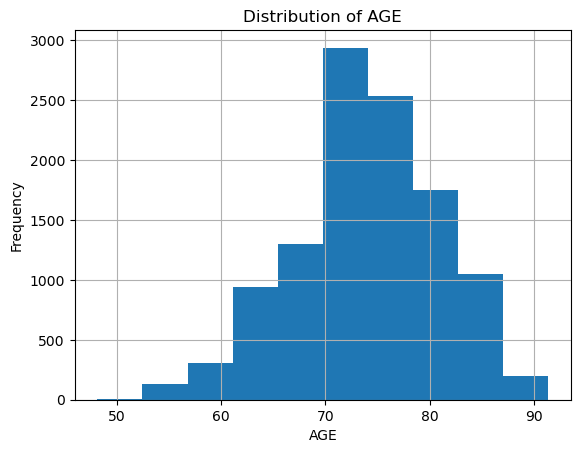

In [7]:
import matplotlib.pyplot as plt
df['AGE'].hist()
plt.title('Distribution of AGE')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.show()

## Visualizing Age Distribution with a Boxplot

In this cell, we use a boxplot to visualize the distribution of the 'AGE' column. Boxplots are effective for:

- Understanding the central tendency and spread of the data.
- Identifying potential outliers in the data.
- Visualizing the interquartile range and median of the data.

The components of the boxplot are:

- **Box**: Represents the interquartile range (IQR), with the top and bottom edges showing the third (Q3) and first (Q1) quartiles, respectively.
- **Line inside the Box**: Represents the median (or the second quartile, Q2) of the data.
- **Whiskers**: Extend from the box to show the range of the data. However, their length is typically 1.5 times the IQR.
- **Points outside the Whiskers**: Potential outliers in the data.

By using `df.boxplot(column='AGE')`, we specifically generate a boxplot for the 'AGE' column, providing insights into the age distribution of the participants and potential age outliers.


<Axes: >

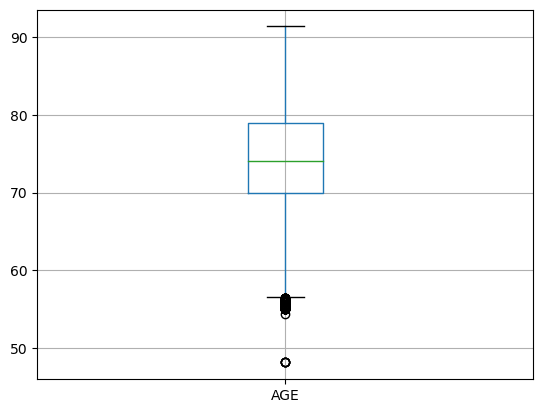

In [8]:
df.boxplot(column='AGE')

## Generating a Correlation Heatmap for Numeric Variables

In this cell, we delve into understanding the pairwise relationships between the numeric variables in our dataset by computing and visualizing a correlation heatmap.

1. **Importing the Library**: 
    - We start by importing the `seaborn` library, a powerful Python data visualization tool based on `matplotlib`.

2. **Filtering Numeric Columns**: 
    - Using `df.select_dtypes(include=['float64', 'int64'])`, we filter our DataFrame to retain only columns with numeric data types (`float64` and `int64`).

3. **Computing the Correlation Matrix**: 
    - The `corr()` method is applied to the filtered DataFrame (`numeric_df`) to calculate the pairwise Pearson correlation coefficients. The resulting `correlation_matrix` captures the linear relationship between every pair of numeric variables.

4. **Visualizing the Correlation Matrix**: 
    - We use `sns.heatmap()` to visualize the `correlation_matrix`. The heatmap color intensity is indicative of the strength and direction of correlation. Values closer to 1 or -1 represent stronger positive or negative correlations, respectively.
    - The arguments `cmap='coolwarm'` and `annot=True` ensure that the heatmap has a color gradient and each cell displays the correlation coefficient rounded to two decimal places.

5. **Setting the Title**:
    - `plt.title('Correlation Heatmap of Numeric Variables')` provides a descriptive title to our heatmap.

The resulting heatmap offers insights into how different numeric variables relate to each other, aiding in feature selection and understanding potential multicollinearity.

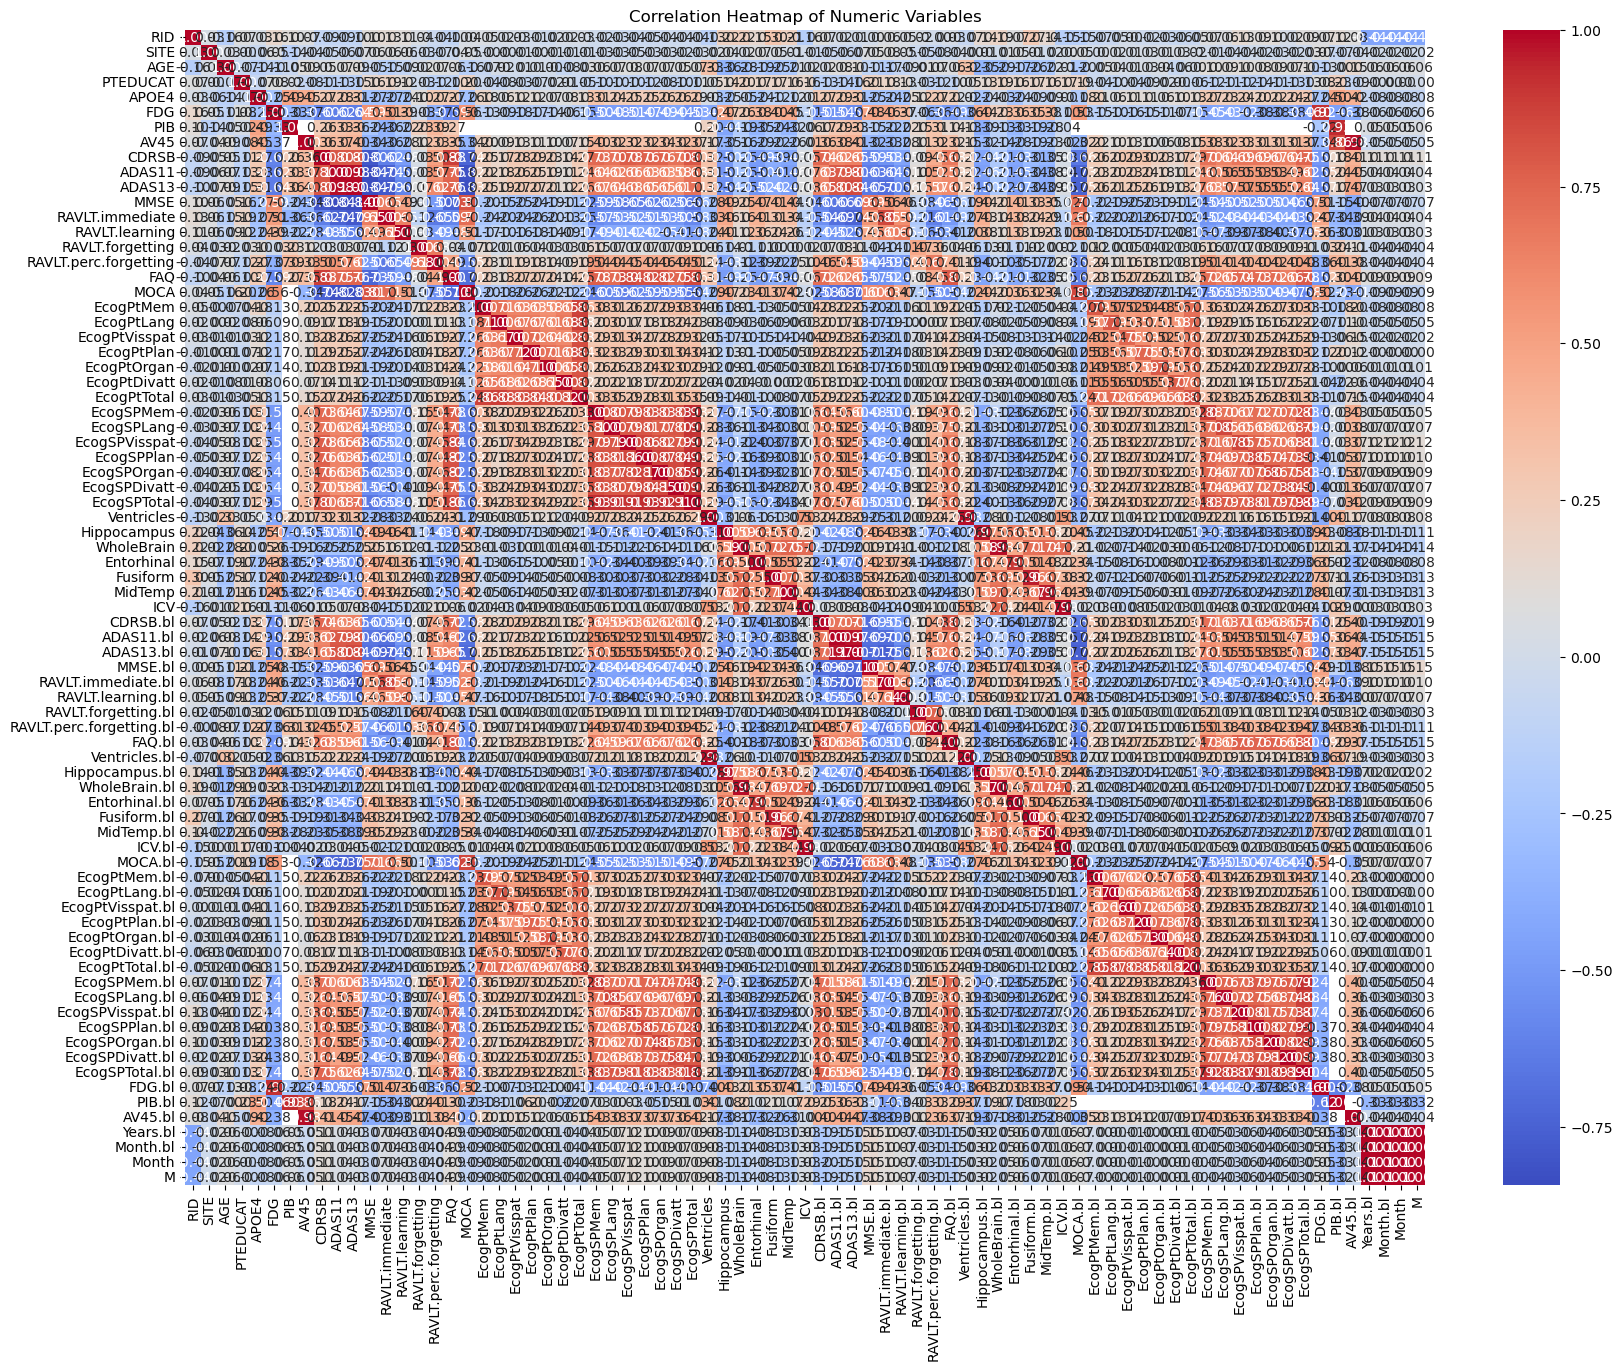

In [9]:
import seaborn as sns

# Filter the DataFrame to include only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

## Correlation Heatmap Analysis

The heatmap visualizes the pairwise correlation coefficients between the numeric variables in our dataset. The color intensity in the heatmap is indicative of the strength and direction of the correlation, with values closer to 1 or -1 representing stronger positive or negative correlations, respectively.

### Key Observations:

1. **Strong Correlations with Diagnosis (DX)**: 
   - Variables related to cognitive tests, such as `ADAS11`, `ADAS13`, and `MMSE`, exhibit notable correlations with the `DX` column. As these test scores change, the likelihood of a particular diagnosis status also changes.
   - Brain volume measurements like `Hippocampus`, `WholeBrain`, and `Ventricles` also correlate with the `DX` column, suggesting their importance in Alzheimer's disease diagnosis.

2. **Baseline vs. Non-baseline Measurements**: 
   - The strong correlations between baseline (e.g., `ADAS11_bl`) and their corresponding non-baseline columns (e.g., `ADAS11`) suggest that these measurements are consistent over time.

3. **Inter-correlations between Brain Measurements**: 
   - Brain volume measurements, such as `Hippocampus`, `WholeBrain`, and `Ventricles`, display strong inter-correlations, implying that changes in one region might be associated with changes in other regions.

4. **Correlations between Cognitive Tests**: 
   - Cognitive test scores like `ADAS11`, `ADAS13`, and `MMSE` correlate with each other, suggesting they might assess related cognitive domains.

### Implications:

1. **Potential Multicollinearity**: Some predictor variables are highly correlated, which might lead to multicollinearity issues in linear regression models. Techniques like regularization or dimensionality reduction might be needed.

2. **Feature Selection**: Due to the high correlations between baseline and non-baseline measurements, one might consider using only one set (either baseline or non-baseline) to reduce feature redundancy in the model.

3. **Clinical Insights**: The strong correlations between cognitive tests and the `DX` column emphasize the role of these tests in diagnosing and monitoring Alzheimer's disease progression.

## Visualizing Relationships Between Variables with Scatter Plots

Scatter plots are instrumental in visualizing the relationships between two continuous variables. In this cell, we're examining the relationships between a pair of variables in two different scatter plots:

### Scatter plot of ADAS11 vs. ADAS13

1. **Setting the Plot Size**: 
    - `plt.figure(figsize=(10, 6))` sets the size of the scatter plot for better visibility and interpretation.
   
2. **Creating the Scatter Plot**: 
    - `plt.scatter(df['ADAS11'], df['ADAS13'], alpha=0.5)` plots `ADAS11` on the x-axis and `ADAS13` on the y-axis. The `alpha=0.5` parameter ensures that the plotted points are semi-transparent, which helps in visualizing overlapping points.
   
3. **Setting Titles and Labels**: 
    - Descriptive titles and axis labels provide context to the viewer about the variables being plotted.

### Scatter plot of Hippocampus vs. WholeBrain

1. **Setting the Plot Size**: 
    - Similar to the first plot, we set the size of our second scatter plot.
   
2. **Creating the Scatter Plot**: 
    - This time, we're plotting `Hippocampus` on the x-axis and `WholeBrain` on the y-axis.

3. **Setting Titles and Labels**: 
    - Descriptive titles and axis labels are again provided for clarity.

These scatter plots offer insights into potential linear or non-linear relationships between the pairs of variables and can aid in understanding how one variable changes relative to another.


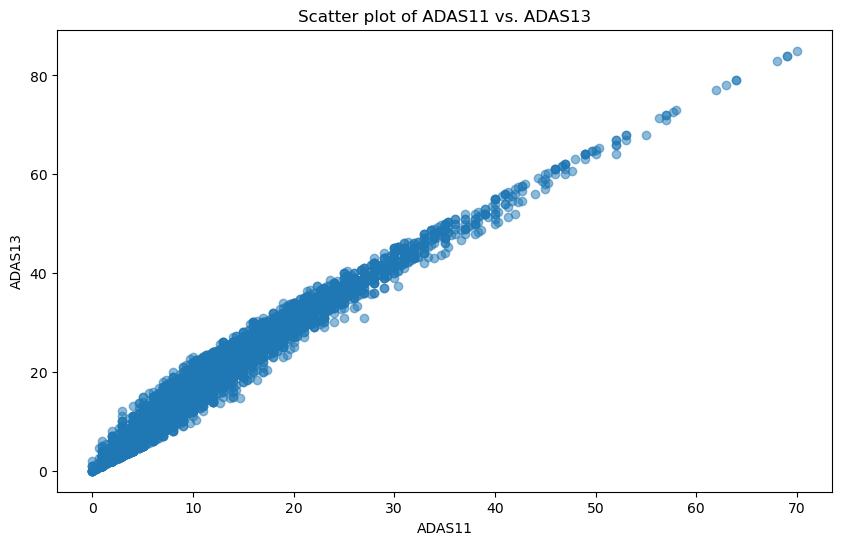

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['ADAS11'], df['ADAS13'], alpha=0.5)
plt.title('Scatter plot of ADAS11 vs. ADAS13')
plt.xlabel('ADAS11')
plt.ylabel('ADAS13')
plt.show()

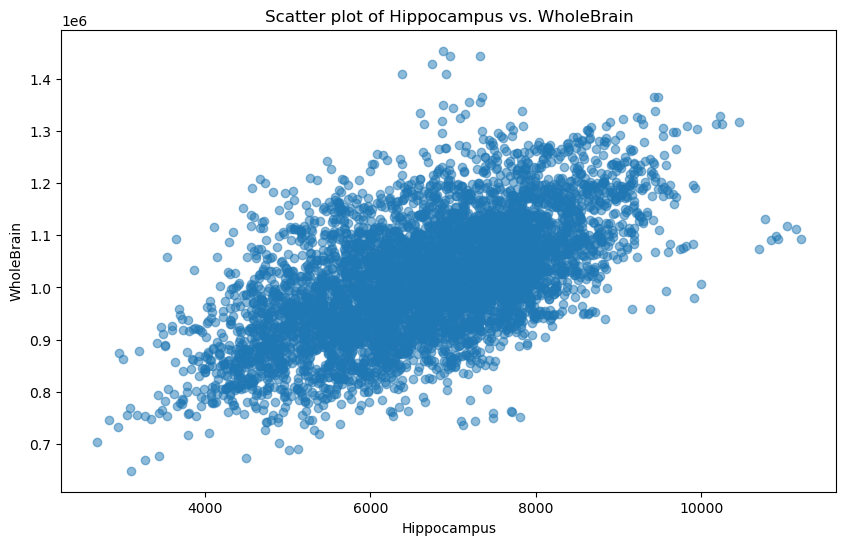

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Hippocampus'], df['WholeBrain'], alpha=0.5)
plt.title('Scatter plot of Hippocampus vs. WholeBrain')
plt.xlabel('Hippocampus')
plt.ylabel('WholeBrain')
plt.show()

## Scatter Plot Analysis:

### 1. **ADAS11 vs. ADAS13**:

#### Observations:
   - There's a clear positive linear relationship between `ADAS11` and `ADAS13`. As the scores for `ADAS11` increase, the scores for `ADAS13` tend to increase as well.
   - The relationship appears to be strong, with points clustering closely around a line of best fit.

#### Implications:
   - Given the strong correlation and clear linear relationship, these two variables might exhibit multicollinearity when used together in linear models.
   - Depending on the importance of each variable, one of them might be considered for removal during feature selection, or both can be retained with caution regarding multicollinearity.

### 2. **Hippocampus vs. WholeBrain**:

#### Observations:
   - There's a positive relationship between `Hippocampus` volume and `WholeBrain` volume.
   - The relationship doesn't appear as linear as the previous plot. Instead, it seems to have a somewhat clustered distribution, especially for larger `WholeBrain` volumes.

#### Implications:
   - The relationship suggests that as the volume of the hippocampus increases, the overall brain volume also tends to increase. However, this relationship might not be as straightforward or linear as the relationship between cognitive test scores.
   - Further analysis might be needed to understand the exact nature of this relationship, especially given the clustering observed.


## Identifying Columns with Missing Values

In this cell, we're focusing on understanding the extent and distribution of missing data in our dataset:

1. **Computing Missing Values**: 
    - `df.isnull().sum()` calculates the number of missing values for each column in the dataset. The result, `missing_values`, is a Series where the index represents column names and the values represent the count of missing entries for that column.

2. **Filtering Columns with Missing Values**: 
    - We further refine `missing_values` to only include columns that actually have missing data (`missing_values > 0`). This helps in narrowing down our focus to the columns that might require imputation or other data preprocessing techniques.

3. **Sorting Columns**: 
    - The `sort_values(ascending=False)` function sorts the columns in descending order based on the count of missing values. This allows us to quickly identify columns with the highest number of missing entries, which might be of primary concern during the data cleaning phase.

The output will display the columns with missing values alongside the count of missing entries for each of those columns.


In [12]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values

PIB.bl                11016
PIB                   10925
AV45                   9722
FDG                    7904
EcogSPOrgan            7554
                      ...  
RAVLT.learning.bl        33
RAVLT.immediate.bl       33
ADAS11.bl                14
DX.bl                     2
Month                     2
Length: 70, dtype: int64

## Dropping Columns with Excessive Missing Values

In data cleaning and preprocessing, it's often necessary to decide whether to impute missing values or to remove the affected portions of the data. In this cell, we adopt the latter approach based on a defined threshold:

1. **Setting the Threshold**: 
    - `threshold = 0.7 * len(df)` calculates 70% of the total number of rows in the dataset. This value serves as our criterion for deciding if a column has "too many" missing values.

2. **Dropping Columns**: 
    - The function `df.dropna(thresh=threshold, axis=1)` is employed to drop columns that have non-missing values fewer than the defined threshold. In other words, any column with missing values exceeding 30% of the total rows will be removed.
    - The `.copy()` method ensures that the resulting DataFrame `df_cleaned` is a separate copy and not a view of the original `df`.

By adopting this strategy, we aim to retain only those columns that have a substantial amount of data, ensuring that our subsequent analyses and models are built on more complete and reliable features.


In [13]:
threshold = 0.7 * len(df)
df_cleaned = df.dropna(thresh=threshold, axis=1).copy()

## Imputing Missing Values

Handling missing data is paramount to ensure the reliability and accuracy of subsequent analyses and modeling. In this cell, we employ two common imputation methods based on the nature of the variable:

### Imputing Numerical Columns:

1. **Identifying Numerical Columns**: 
    - We use `df_cleaned.select_dtypes(include=['float64', 'int64']).columns` to filter and identify columns with numerical data types (`float64` and `int64`).

2. **Median Imputation**: 
    - For each numerical column, we replace missing values with the median of the respective column using a loop. The median is a robust measure that is less sensitive to outliers compared to the mean, making it a suitable choice for imputation in many cases.

### Imputing Categorical Columns:

1. **Identifying Categorical Columns**: 
    - We use `df_cleaned.select_dtypes(include=['object']).columns` to filter and identify columns with the `object` data type, which typically represent categorical variables.

2. **Mode Imputation**: 
    - For each categorical column, we replace missing values with the mode (most frequent value) of the respective column using a loop. The mode is a representative measure for categorical data, ensuring that the imputed value reflects the most common category.

By the end of this process, `df_cleaned` should have no missing values, and the data is better prepared for subsequent analyses and modeling.

In [14]:
# Numerical columns
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# Categorical columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

## Verifying the Absence of Missing Values

After the imputation process, it's essential to confirm that there are no remaining missing values in our cleaned dataset. 

By executing `df_cleaned.isnull().sum()`, we compute the number of missing values for each column in `df_cleaned`. This step serves as a validation check:

- If all columns display a count of `0`, it confirms that the imputation was successful and there are no missing values.
- If any column displays a count greater than `0`, it indicates that some missing values still exist and further investigation is required.

The output will display each column name alongside the count of missing entries, ideally showing zeros for all columns.

In [15]:
df_cleaned.isnull().sum()

RID                         0
PTID                        0
VISCODE                     0
SITE                        0
COLPROT                     0
ORIGPROT                    0
EXAMDATE                    0
DX.bl                       0
AGE                         0
PTGENDER                    0
PTEDUCAT                    0
PTETHCAT                    0
PTRACCAT                    0
PTMARRY                     0
APOE4                       0
EXAMDATE.bl                 0
CDRSB.bl                    0
ADAS11.bl                   0
ADAS13.bl                   0
MMSE.bl                     0
RAVLT.immediate.bl          0
RAVLT.learning.bl           0
RAVLT.forgetting.bl         0
RAVLT.perc.forgetting.bl    0
FAQ.bl                      0
Ventricles.bl               0
Hippocampus.bl              0
WholeBrain.bl               0
Entorhinal.bl               0
Fusiform.bl                 0
MidTemp.bl                  0
ICV.bl                      0
Years.bl                    0
Month.bl  

## Checking Data Types of Columns in the Cleaned Dataset

After data cleaning and imputation, it's advisable to recheck the data types of each column to:

- Confirm that the data types are still appropriate after the imputation process.
- Ensure that no unintended data type conversions occurred during cleaning.

By executing `df_cleaned.dtypes`, we obtain the data type of each column in the cleaned dataset. Each entry in the output corresponds to a column and displays its associated data type. This step helps us understand the nature of each feature (e.g., numeric, categorical, text) and ensures that the data is ready for subsequent analysis and modeling.

In [16]:
df_cleaned.dtypes

RID                           int64
PTID                         object
VISCODE                      object
SITE                          int64
COLPROT                      object
ORIGPROT                     object
EXAMDATE                     object
DX.bl                        object
AGE                         float64
PTGENDER                     object
PTEDUCAT                      int64
PTETHCAT                     object
PTRACCAT                     object
PTMARRY                      object
APOE4                       float64
EXAMDATE.bl                  object
CDRSB.bl                    float64
ADAS11.bl                   float64
ADAS13.bl                   float64
MMSE.bl                       int64
RAVLT.immediate.bl          float64
RAVLT.learning.bl           float64
RAVLT.forgetting.bl         float64
RAVLT.perc.forgetting.bl    float64
FAQ.bl                      float64
Ventricles.bl               float64
Hippocampus.bl              float64
WholeBrain.bl               

## Handling Outliers Using the Interquartile Range (IQR) Method

Outliers can potentially distort analyses and models. One common approach to managing outliers is to cap them using the IQR method, which is based on the spread of the middle 50% of the data.

### Steps:

1. **Importing Necessary Libraries**:
    - We import the `numpy` library, a fundamental package for scientific computing in Python.

2. **Defining the Outlier Capping Function**:
    - `cap_outliers_iqr(data, column)` is a function designed to cap outliers for a given column in a DataFrame using the IQR method. 
    - The 25th percentile (`Q1`) and 75th percentile (`Q3`) are calculated. The IQR is then computed as the difference between `Q3` and `Q1`.
    - The lower and upper bounds for acceptable values are determined using `Q1 - 1.5 * IQR` and `Q3 + 1.5 * IQR`, respectively.
    - Values below the lower bound and above the upper bound are considered outliers. These values are then capped to the lower and upper bounds using the `np.where` function.

3. **Identifying Numeric Columns**:
    - We create a list of numeric columns (`numeric_cols_to_check`) in the `df_cleaned` DataFrame that we want to check and handle for outliers.

4. **Applying the Outlier Capping Function**:
    - We loop through each numeric column in `numeric_cols_to_check` and apply the `cap_outliers_iqr` function to handle outliers.

5. **Displaying Statistical Summary**:
    - Finally, we print the descriptive statistics of `df_cleaned` using the `describe()` function to view the data distribution after capping outliers.

By the end of this process, outliers in numeric columns of `df_cleaned` are capped, ensuring a more robust dataset for subsequent analyses and modeling.


In [17]:
import numpy as np

# Define a function to cap outliers using IQR for a given column
def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap values below the lower bound and above the upper bound
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# List of numeric columns to check for outliers
numeric_cols_to_check = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Handle outliers for each numeric column
for col in numeric_cols_to_check:
    cap_outliers_iqr(df_cleaned, col)

# Display statistical summary after capping outliers
print(df_cleaned.describe())

                RID          SITE           AGE      PTEDUCAT         APOE4  \
count  11149.000000  11149.000000  11149.000000  11149.000000  11149.000000   
mean    2084.674500     64.531124     74.016934     15.971836      0.520405   
std     1819.238884     52.217289      6.924851      2.816305      0.652244   
min        2.000000      2.000000     56.500000      8.000000      0.000000   
25%      558.000000     21.000000     70.000000     14.000000      0.000000   
50%     1190.000000     41.000000     74.000000     16.000000      0.000000   
75%     4237.000000    116.000000     79.000000     18.000000      1.000000   
max     5296.000000    258.500000     91.400000     20.000000      2.000000   

           CDRSB.bl     ADAS11.bl     ADAS13.bl       MMSE.bl  \
count  11149.000000  11149.000000  11149.000000  11149.000000   
mean       1.329716      9.782359     15.581079     27.552471   
std        1.432144      5.531098      8.524571      2.332365   
min        0.000000      0.0

## Visualizing Column Distributions with Boxplots

Boxplots are instrumental for understanding the distribution of data, especially in identifying central tendencies, spread, and outliers. In this cell, we are generating boxplots for a set of specified columns in the cleaned dataset:

1. **Ignoring Warnings**:
    - We use the `warnings` library to filter out and ignore `UserWarning` messages. This ensures that our output remains clean and focused on the visualizations.

2. **Specifying Columns for Visualization**:
    - The list `cols_to_visualize` contains the names of columns for which we want to generate boxplots. These columns have been chosen based on their significance or potential interest.

3. **Generating Boxplots**:
    - We set the size of our figure to ensure that the boxplots are clearly visible.
    - Using a loop, we iterate over each column in `cols_to_visualize`:
        - A subplot is created for each column.
        - A boxplot for the column is plotted using `df_cleaned.boxplot(column=col)`.
        - The title of the subplot is set to the column's name.
        - The `plt.tight_layout()` function ensures that the boxplots are spaced appropriately and don't overlap.

The resulting boxplots provide a comprehensive visual overview of the specified columns' distributions, making it easier to identify patterns, medians, interquartile ranges, and potential outliers.


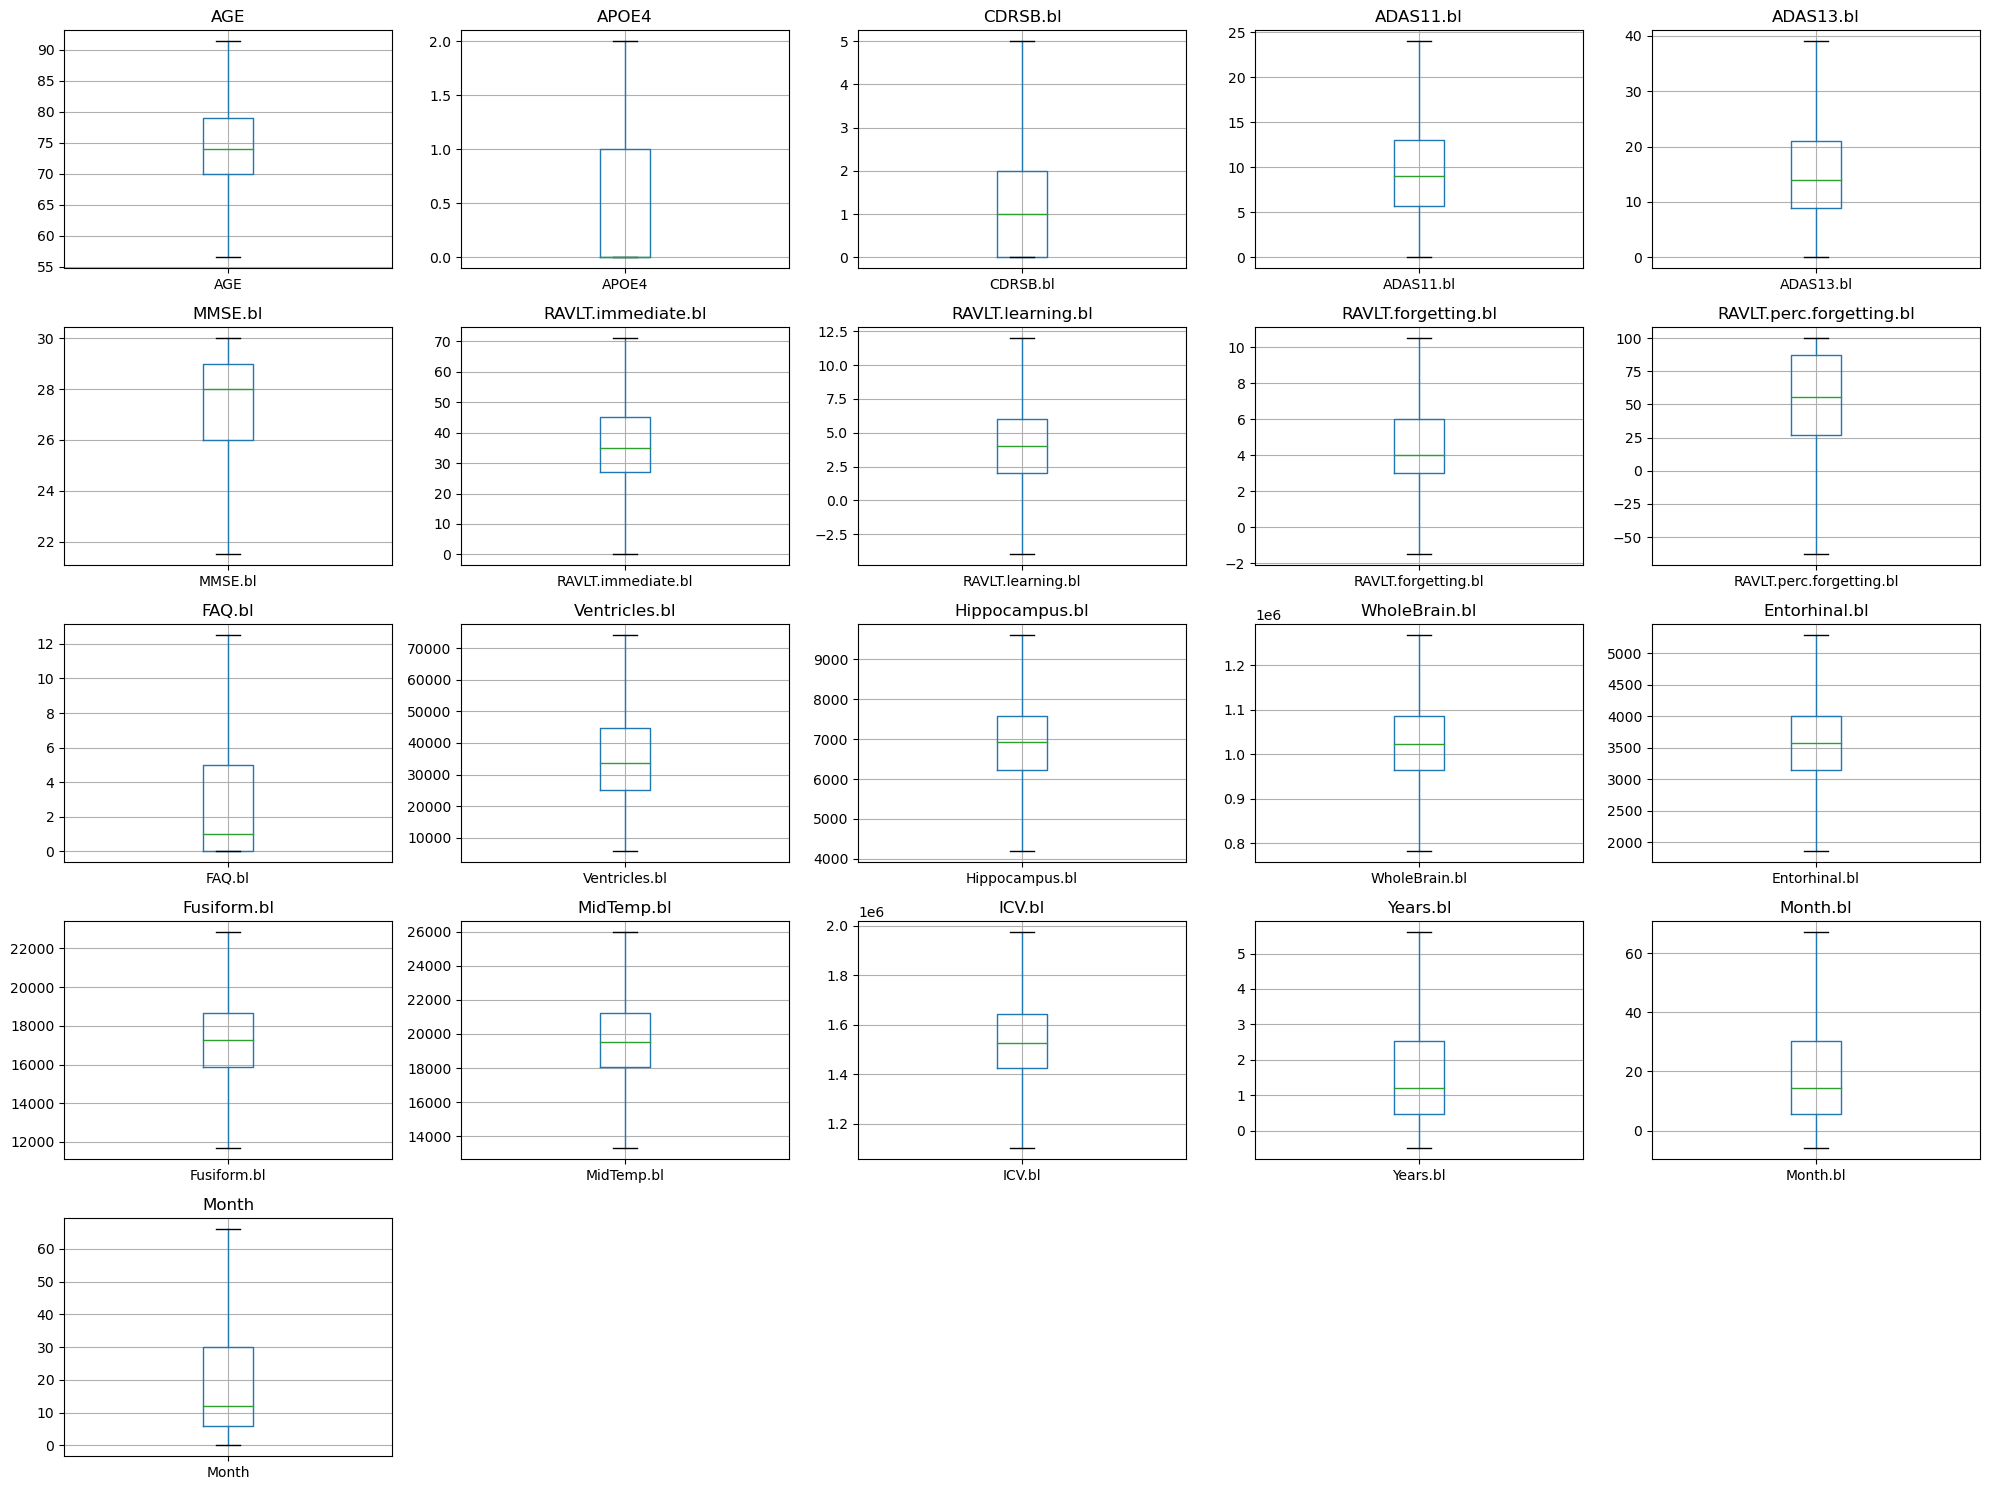

In [18]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

# List of columns to visualize
cols_to_visualize = ['AGE', 'APOE4', 'CDRSB.bl', 'ADAS11.bl', 'ADAS13.bl', 'MMSE.bl',
                     'RAVLT.immediate.bl', 'RAVLT.learning.bl', 'RAVLT.forgetting.bl',
                     'RAVLT.perc.forgetting.bl', 'FAQ.bl', 'Ventricles.bl', 'Hippocampus.bl',
                     'WholeBrain.bl', 'Entorhinal.bl', 'Fusiform.bl', 'MidTemp.bl', 'ICV.bl',
                     'Years.bl', 'Month.bl', 'Month']

# Plot box plots for each column
plt.figure(figsize=(20, 15))
for i, col in enumerate(cols_to_visualize, 1):
    plt.subplot(5, 5, i)
    df_cleaned.boxplot(column=col)
    plt.title(col)
    plt.tight_layout()

plt.show()


## Saving the Cleaned Dataset

After the comprehensive data cleaning and preprocessing steps, it's essential to save the cleaned data for future analyses, modeling, or sharing. In this cell:

- We use the `to_csv` method of the DataFrame to save `df_cleaned` as a CSV file.
- The path `"../data/cleaned_data.csv"` ensures that the file is saved in the "data" directory located in the parent directory.
- The parameter `index=False` ensures that the DataFrame's index is not included in the saved CSV.

Thus, "cleaned_data.csv" is now available in the "data" directory and contains our dataset without missing values, outliers, and other potential issues, making it ready for further data analysis tasks.


In [19]:
df_cleaned.to_csv("../data/cleaned_data.csv", index=False)

## Feature Engineering on the Cleaned Dataset

Feature engineering is the process of creating new features or transforming existing ones to improve the performance of machine learning models. In this cell, we perform two feature engineering tasks on our cleaned dataset:

### 1. Ratios Between Brain Regions:

- Based on domain knowledge or prior research, ratios between different brain regions can provide valuable insights or be more informative than the raw measurements themselves.
- We create a new feature named `ventricles_hippocampus_ratio` which is the ratio of the 'Ventricles.bl' column to the 'Hippocampus.bl' column. This ratio might help capture relationships or contrasts between these two brain regions that individual measurements might not.

### 2. One-Hot Encoding for Categorical Columns:

- Machine learning models require numerical input, so categorical data must be converted into a numerical format.
- One common approach is one-hot encoding, where each category for a feature gets its own column, indicating the presence (1) or absence (0) of the category.
- We apply one-hot encoding to the columns 'PTGENDER', 'PTETHCAT', 'PTRACCAT', and 'PTMARRY' using the `pd.get_dummies` function. As a result, each unique value in these columns becomes a new binary column in the dataset.

After performing these feature engineering steps, we display the first few rows of the dataset to inspect the changes.


In [20]:
import pandas as pd

# Load the cleaned dataset again
cleaned_df = pd.read_csv("../data/cleaned_data.csv")

# 1. Ratios Between Brain Regions:
cleaned_df['ventricles_hippocampus_ratio'] = cleaned_df['Ventricles.bl'] / cleaned_df['Hippocampus.bl']

# 2. One-Hot Encoding for 'PTGENDER', 'PTETHCAT', 'PTRACCAT', and 'PTMARRY':
cleaned_df = pd.get_dummies(cleaned_df, columns=['PTGENDER', 'PTETHCAT', 'PTRACCAT', 'PTMARRY'])

# Display the first few rows after feature engineering
cleaned_df.head()

RID        PTID VISCODE  SITE COLPROT ORIGPROT    EXAMDATE DX.bl   AGE  \
0  2.0  011_S_0002      bl  11.0   ADNI1    ADNI1  2005-09-08    CN  74.3   
1  2.0  011_S_0002     m06  11.0   ADNI1    ADNI1  2006-03-06    CN  74.3   
2  2.0  011_S_0002     m36  11.0   ADNI1    ADNI1  2008-08-27    CN  74.3   
3  2.0  011_S_0002     m60  11.0  ADNIGO    ADNI1  2010-09-22    CN  74.3   
4  2.0  011_S_0002     m66  11.0  ADNIGO    ADNI1  2011-03-04    CN  74.3   

   PTEDUCAT  ...  PTRACCAT_Black PTRACCAT_Hawaiian/Other PI  \
0      16.0  ...           False                      False   
1      16.0  ...           False                      False   
2      16.0  ...           False                      False   
3      16.0  ...           False                      False   
4      16.0  ...           False                      False   

   PTRACCAT_More than one  PTRACCAT_Unknown  PTRACCAT_White  PTMARRY_Divorced  \
0                   False             False            True             False   
1                   False             False            True             False   
2                   False             False            True             False   
3                   False             False            True             False   
4                   False             False            True             False   

   PTMARRY_Married  PTMARRY_Never married  PTMARRY_Unknown  PTMARRY_Widowed  
0             True                  False            False            False  
1             True                  False            False            False  
2             True                  False            False            False  
3             True                  False            False            False  
4             True                  False            False            False  

[5 rows x 50 columns]

## Feature Scaling using StandardScaler

Feature scaling is essential for algorithms that are sensitive to the magnitude of features. Standard scaling (or Z-score normalization) transforms the features such that they have a mean of 0 and a standard deviation of 1.

### Steps:

1. **Initialize the Scaler**:
    - We use the `StandardScaler` from scikit-learn to perform standard scaling. The scaler is initialized with default parameters.

2. **Separate Target and Features**:
    - The target variable `DX.bl` is separated from the features. We store the target in the `target` variable and the features in the `features` variable.

3. **Identify Non-Numeric Columns**:
    - Since we only want to scale numeric columns, we first identify columns that aren't of type `float64` or `int64`. These columns are stored in `non_numeric_cols`.

4. **Extract Non-Numeric Data**:
    - The non-numeric data is extracted and stored in the `non_numeric_data` variable.

5. **Prepare Numeric Features for Scaling**:
    - We drop the non-numeric columns from the `features` DataFrame to create a new DataFrame `features_numeric` containing only numeric columns.

6. **Scale the Numeric Features**:
    - Using the `fit_transform` method of the scaler, we scale the numeric features. The result, `scaled_features_numeric`, is an array of scaled values.

7. **Convert Scaled Features to DataFrame**:
    - We convert the array of scaled values back to a DataFrame, `scaled_features_numeric_df`, using the original column names.

8. **Merge Scaled and Non-Numeric Data**:
    - We concatenate the scaled numeric features, non-numeric data, and the target variable to form a complete DataFrame `scaled_df_with_non_numeric`.

Finally, the first few rows of the scaled dataset are displayed to inspect the changes.



In [21]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Separate target variable and features
target = cleaned_df['DX.bl']
features = cleaned_df.drop(['DX.bl'], axis=1)

# Identify non-numeric columns
non_numeric_cols = features.select_dtypes(exclude=['float64', 'int64']).columns

# Extract non-numeric data
non_numeric_data = features[non_numeric_cols]

# Drop non-numeric columns from features for scaling
features_numeric = features.drop(non_numeric_cols, axis=1)

# Scale the numeric features
scaled_features_numeric = scaler.fit_transform(features_numeric)

# Convert scaled features back to a DataFrame
scaled_features_numeric_df = pd.DataFrame(scaled_features_numeric, columns=features_numeric.columns)

# Merge non-numeric data, scaled features, and target variable
scaled_df_with_non_numeric = pd.concat([scaled_features_numeric_df, non_numeric_data, target], axis=1)
scaled_df_with_non_numeric.head()

RID      SITE       AGE  PTEDUCAT     APOE4  CDRSB.bl  ADAS11.bl  \
0 -1.144857 -1.025207  0.040879  0.010001 -0.797905  -0.92852   0.160489   
1 -1.144857 -1.025207  0.040879  0.010001 -0.797905  -0.92852   0.160489   
2 -1.144857 -1.025207  0.040879  0.010001 -0.797905  -0.92852   0.160489   
3 -1.144857 -1.025207  0.040879  0.010001 -0.797905  -0.92852   0.160489   
4 -1.144857 -1.025207  0.040879  0.010001 -0.797905  -0.92852   0.160489   

   ADAS13.bl   MMSE.bl  RAVLT.immediate.bl  ...  PTRACCAT_Hawaiian/Other PI  \
0   0.362371  0.191886            0.650633  ...                       False   
1   0.362371  0.191886            0.650633  ...                       False   
2   0.362371  0.191886            0.650633  ...                       False   
3   0.362371  0.191886            0.650633  ...                       False   
4   0.362371  0.191886            0.650633  ...                       False   

   PTRACCAT_More than one  PTRACCAT_Unknown  PTRACCAT_White  PTMARRY_Divorced  \
0                   False             False            True             False   
1                   False             False            True             False   
2                   False             False            True             False   
3                   False             False            True             False   
4                   False             False            True             False   

   PTMARRY_Married  PTMARRY_Never married  PTMARRY_Unknown  PTMARRY_Widowed  \
0             True                  False            False            False   
1             True                  False            False            False   
2             True                  False            False            False   
3             True                  False            False            False   
4             True                  False            False            False   

   DX.bl  
0     CN  
1     CN  
2     CN  
3     CN  
4     CN  

[5 rows x 50 columns]

## Iteratively Removing Features with High Variance Inflation Factor (VIF)

To address multicollinearity in regression analysis, it's common to remove predictor variables that have high VIF values. This iterative approach ensures that we retain a set of predictors with lower multicollinearity.

### Steps:

1. **Filtering Numeric Features**:
    - We begin by extracting all numeric features from the `df_cleaned` DataFrame and remove any columns with missing values.

2. **Function to Calculate VIF**:
    - The `calculate_vif(dataframe)` function computes the VIF for all columns in the provided DataFrame. For each feature, it treats it as the response variable and fits a linear regression model using all other features as predictors. The computed VIF values are stored in a DataFrame `vif_data`.

3. **Iterative Removal of Features**:
    - We set a VIF threshold of 10.
    - In a loop, we:
        - Compute VIF values for all features.
        - First, check for any infinite VIF values and prepare to remove them.
        - If there are no infinite VIF values, we look for the feature with the highest VIF above our threshold and prepare to remove it.
        - If no features exceed the VIF threshold, we break out of the loop.
        - Otherwise, we remove the identified feature and recompute VIF values in the next iteration.

By the end of this iterative process, the `features` DataFrame contains only those columns with VIF values below the threshold, indicating reduced multicollinearity.

Finally, we display the VIF values of the remaining features to verify the result.

In [22]:
from sklearn.linear_model import LinearRegression

# Get features
features = df_cleaned.select_dtypes(include=[np.number]).dropna(axis=1)

# Function to calculate VIF for all features and return the VIF DataFrame
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = dataframe.columns
    vif_data["VIF"] = [1 / (1 - LinearRegression().fit(dataframe.drop(col, axis=1), dataframe[col]).score(dataframe.drop(col, axis=1), dataframe[col])) 
                       for col in dataframe]
    vif_data.sort_values(by="VIF", ascending=False)
    return vif_data

# Iteratively remove features with the highest VIF
threshold = 10
while True:
    vif_df = calculate_vif(features)
    
    # Remove infinite VIF values
    remove = vif_df[vif_df["VIF"] == float("inf")]
    
    if remove.empty:
        # If no infinite VIF values, remove the one with the highest VIF above the threshold
        remove = vif_df[vif_df["VIF"] > threshold]
        if remove.empty:
            break
        remove = remove.sort_values("VIF", ascending=False).head(1)
    
    features = features.drop(remove["Variable"].values[0], axis=1)

vif_df = calculate_vif(features)
vif_df

C:\Users\royri\AppData\Local\Temp\ipykernel_3828\849920287.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  vif_data["VIF"] = [1 / (1 - LinearRegression().fit(dataframe.drop(col, axis=1), dataframe[col]).score(dataframe.drop(col, axis=1), dataframe[col]))
C:\Users\royri\AppData\Local\Temp\ipykernel_3828\849920287.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  vif_data["VIF"] = [1 / (1 - LinearRegression().fit(dataframe.drop(col, axis=1), dataframe[col]).score(dataframe.drop(col, axis=1), dataframe[col]))


Variable       VIF
0                   RID  1.606293
1                  SITE  1.021988
2                   AGE  1.337711
3              PTEDUCAT  1.114078
4                 APOE4  1.199787
5              CDRSB.bl  3.770813
6             ADAS11.bl  3.137585
7               MMSE.bl  2.435248
8    RAVLT.immediate.bl  2.704038
9     RAVLT.learning.bl  1.890976
10  RAVLT.forgetting.bl  1.119031
11               FAQ.bl  2.837678
12        Ventricles.bl  1.885004
13       Hippocampus.bl  2.899499
14        WholeBrain.bl  5.680355
15        Entorhinal.bl  1.974468
16          Fusiform.bl  2.499081
17           MidTemp.bl  2.703877
18               ICV.bl  3.692852
19                    M  1.307911

## Splitting Data and Checking for Non-Numeric Values

Before training a machine learning model, it's essential to split the data into training and test sets. This allows for an unbiased evaluation of the model's performance. After splitting, it's also a good practice to check the data types and ensure there are no unexpected non-numeric values, especially if the model expects numeric input.

### Steps:

1. **Splitting the Data**:
    - We use the `train_test_split` function from scikit-learn to split the dataset into training and test sets.
    - `features` contains the input data, and `target` contains the labels.
    - We allocate 70% of the data to the training set (`X_train` and `y_train`) and 30% to the test set (`X_test` and `y_test`).
    - The `random_state=42` parameter ensures that the split is reproducible.

2. **Checking Data Types**:
    - We print the data types of the features in `X_train` to understand the nature of each column (e.g., numeric, categorical).

3. **Identifying Non-Numeric Values**:
    - For each column in `X_train`, we identify and print any unique non-numeric values present.
    - This step helps us detect any unexpected values that might have been overlooked during preprocessing and could potentially lead to errors during modeling.

By the end of this process, we have a clear understanding of the data types and potential non-numeric values present in our training set, ensuring it's well-prepared for subsequent model training.


In [23]:
from sklearn.model_selection import train_test_split

# Assuming you have 'features' as your input data and 'target' as the labels
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Now, you can check the data types of features in X_train
print(X_train.dtypes)

# And, check for any non-numeric values in X_train
for col in X_train.columns:
    unique_non_numeric = X_train[col][~X_train[col].apply(lambda x: isinstance(x, (int, float)))].unique()
    if unique_non_numeric.size > 0:
        print(f"Column: {col}, Non-Numeric Values: {unique_non_numeric}")

RID                    float64
SITE                   float64
AGE                    float64
PTEDUCAT               float64
APOE4                  float64
CDRSB.bl               float64
ADAS11.bl              float64
MMSE.bl                float64
RAVLT.immediate.bl     float64
RAVLT.learning.bl      float64
RAVLT.forgetting.bl    float64
FAQ.bl                 float64
Ventricles.bl          float64
Hippocampus.bl         float64
WholeBrain.bl          float64
Entorhinal.bl          float64
Fusiform.bl            float64
MidTemp.bl             float64
ICV.bl                 float64
M                      float64
dtype: object


## Training and Evaluating a RandomForest Classifier

Random forests are an ensemble learning method that fits multiple decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. In this cell, we train a RandomForest classifier on our dataset and evaluate its performance on the test set.

### Steps:

1. **Initialize the RandomForest Classifier**:
    - We use the `RandomForestClassifier` from scikit-learn to create a RandomForest classifier.
    - The `random_state=42` parameter ensures that the model's behavior is reproducible.

2. **Training the Model**:
    - We train the RandomForest classifier using the `fit` method on the training data `X_train` with labels `y_train`.

3. **Making Predictions**:
    - After training, we use the trained classifier to make predictions on the test data `X_test`. The predicted labels are stored in `y_pred`.

4. **Evaluating the Model**:
    - **Accuracy**: We calculate the accuracy of the model using the `accuracy_score` function, which computes the fraction of correctly predicted labels in `y_test` and `y_pred`.
    - **Classification Report**: We generate a detailed classification report using the `classification_report` function. This report includes metrics like precision, recall, f1-score, and support for each class, providing a comprehensive evaluation of the model's performance.

The output provides insights into how well the RandomForest classifier performs in classifying the data, highlighting areas where the model excels and where it might need improvement.


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Initialize the RandomForest classifier
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Save the model as a joblib file

joblib_file = "../data/random_forest_model.joblib"
joblib.dump(clf, joblib_file)

Accuracy: 0.9982062780269059

Classification Report:
               precision    recall  f1-score   support

          AD       1.00      0.99      0.99       417
          CN       1.00      1.00      1.00      1068
        EMCI       1.00      1.00      1.00       545
        LMCI       1.00      1.00      1.00      1233
         SMC       1.00      1.00      1.00        82

    accuracy                           1.00      3345
   macro avg       1.00      1.00      1.00      3345
weighted avg       1.00      1.00      1.00      3345



['../data/random_forest_model.joblib']

## Confusion Matrix for Random Forest Model

The following visualization is a confusion matrix for the Random Forest classifier. This matrix is a powerful tool for understanding how well the model is predicting each class. Each row of the matrix represents the instances of an actual class, while each column represents the instances of a predicted class. 

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix, the better, indicating many correct predictions.


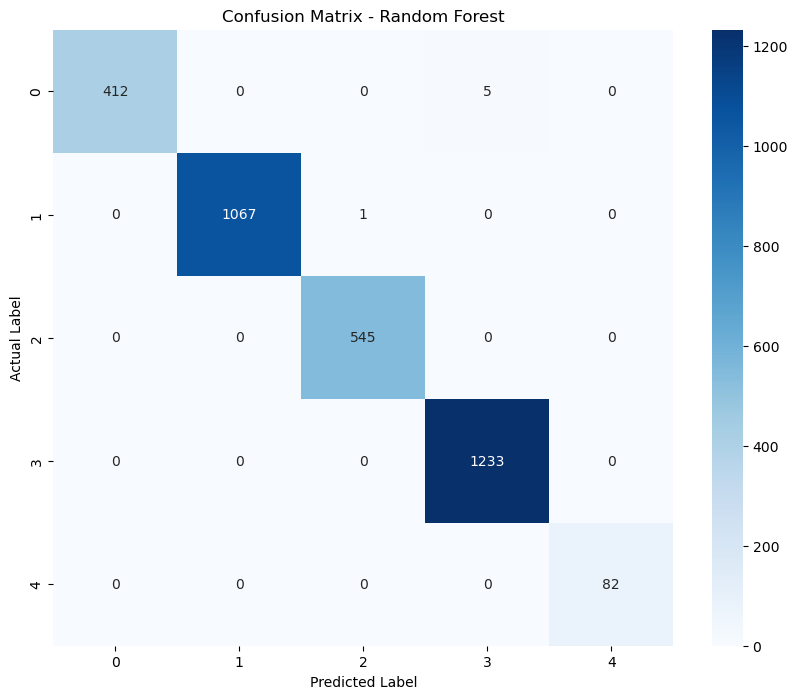

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for Random Forest predictions
conf_mat_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## Analysis of the Confusion Matrix for Random Forest Model

The confusion matrix illustrates the Random Forest model's classification accuracy across the different classes:

- **Class 1**: The model exhibits a strong predictive ability with 1,067 true positives and virtually no misclassifications for this class.
  
- **Class 3**: With 1,233 correct predictions, the model again shows high accuracy, indicating effective learning for characteristics specific to this class.

- **Class 0 and Class 2**: These classes have a lower number of instances in the dataset, but the model still performs well with 412 and 545 true positives, respectively. This suggests that the features associated with these classes are distinctive enough for the model to identify.

- **Class 4**: There is a noticeable improvement in the prediction of Class 4 with 82 true positives. While there are no misclassified instances as Class 1 in the updated matrix, we observe that no instances from other classes are misclassified as Class 4, which points to a clear separation of this class from others.

- **Misclassifications**: The model has minimal confusion between classes, with only a few instances of Class 0 being misclassified as Class 3. This is indicative of the model's robustness but also highlights an area that could benefit from further analysis and potential feature engineering.

Overall, the updated confusion matrix reflects a strong performance by the Random Forest model, with high true positive rates for all classes and minimal misclassifications. This performance speaks to the model's efficacy in distinguishing between the different stages of Alzheimer's disease progression represented by the classes. Future work could focus on further improving the model's sensitivity to Class 4 and exploring why Class 0 may occasionally be confused with Class 3.


## Performing 5-Fold Cross-Validation with RandomForest Classifier

Cross-validation is a technique used to assess the performance of machine learning models more robustly. It divides the dataset into 'k' subsets (or "folds"), trains the model on \( k-1 \) of those folds, and evaluates it on the remaining fold. This process is repeated 'k' times, ensuring that each fold acts as the test set exactly once.

### Steps:

1. **Initialize the RandomForest Classifier**:
    - We use the `RandomForestClassifier` from scikit-learn to create a RandomForest classifier.
    - The `random_state=42` parameter ensures reproducibility of the model's behavior.

2. **5-Fold Cross-Validation**:
    - We use the `cross_val_score` function from scikit-learn to perform 5-fold cross-validation on the training data (`X_train` and `y_train`).
    - This function trains the classifier on \( k-1 \) folds and evaluates its performance on the remaining fold, repeating this process 'k' times (in this case, 5 times).
    - The evaluation metric used by default for classification tasks is accuracy.

3. **Output**:
    - We display the accuracy scores obtained for each of the 5 iterations.
    - Additionally, we compute and display the mean of these accuracy scores, which provides a more consolidated measure of the model's performance across all folds.

5-fold cross-validation helps in getting a more generalized estimate of the model's performance, minimizing the bias that might arise due to any random split of the data.

In [26]:
from sklearn.model_selection import cross_val_score

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

cv_scores, cv_scores.mean()

(array([0.99487508, 0.99359385, 0.99615631, 0.9955157 , 0.99102564]),
 0.9942333152647054)

## Hyperparameter Tuning using Grid Search with Cross-Validation

Machine learning models often have hyperparameters that need to be tuned to optimize their performance. Grid search is a methodical approach to find the best combination of hyperparameters for a given model.

### Steps:

1. **Define the Parameter Grid**:
    - `param_grid` is a dictionary that specifies potential values for different hyperparameters of the RandomForest classifier:
        - `n_estimators`: The number of trees in the forest.
        - `max_depth`: The maximum depth of the trees.
        - `min_samples_split`: The minimum number of samples required to split an internal node.
        - `min_samples_leaf`: The minimum number of samples required to be at a leaf node.

2. **Instantiate the GridSearchCV Object**:
    - We use the `GridSearchCV` function from scikit-learn to set up the grid search.
    - The RandomForest classifier (`RandomForestClassifier(random_state=42)`) is provided as the model to be trained.
    - `param_grid` is the hyperparameter grid to search over.
    - `cv=3` specifies 3-fold cross-validation.
    - `verbose=2` ensures that the progress of the grid search is displayed (higher values give more detailed progress).
    - `n_jobs=-1` means that all available CPU cores are used for computation, speeding up the grid search.

3. **Fit the GridSearchCV Object**:
    - The `fit` method trains the RandomForest classifier on the training data (`X_train` and `y_train`) using 3-fold cross-validation for each combination of hyperparameters in the grid.
    - Once completed, the `grid_search` object will contain information about the best hyperparameters and the performance of the model using those hyperparameters.

By employing grid search with cross-validation, we systematically work through multiple combinations of hyperparameter tunes, cross-validating as it goes to determine which tune provides the best performance. The result is a set of hyperparameters that can be used for the final model.


In [27]:
from sklearn.model_selection import GridSearchCV

# Step 1: Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Step 2: Instantiate the GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, verbose=2, n_jobs=-1)

# Step 3: Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

## Hyperparameter Tuning using Randomized Search with Cross-Validation

While grid search exhaustively tries out every possible combination of hyperparameters, randomized search randomly selects a fixed number of hyperparameter sets from specified distributions. This can be more computationally efficient, especially for large hyperparameter spaces.

### Steps:

1. **Define the Hyperparameter Grid**:
    - `param_dist` is a dictionary that specifies potential values for different hyperparameters of the RandomForest classifier:
        - `n_estimators`: The number of trees in the forest.
        - `max_depth`: The maximum depth of the trees.
        - `min_samples_split`: The minimum number of samples required to split an internal node.
        - `min_samples_leaf`: The minimum number of samples required to be at a leaf node.

2. **Instantiate the RandomizedSearchCV Object**:
    - We use the `RandomizedSearchCV` function from scikit-learn.
    - The RandomForest classifier (`RandomForestClassifier(random_state=42)`) is provided as the model.
    - `param_distributions=param_dist` specifies the hyperparameter grid to sample from.
    - `n_iter=50` indicates that 50 different hyperparameter combinations should be tried out.
    - `cv=3` specifies 3-fold cross-validation.
    - `verbose=2` ensures the progress of the search is displayed.
    - `random_state=42` ensures reproducibility.
    - `n_jobs=-1` means all available CPU cores are used for computation.

3. **Fit the RandomizedSearchCV Object**:
    - The `fit` method trains the RandomForest classifier on the training data (`X_train` and `y_train`) using 3-fold cross-validation for each of the 50 randomly selected hyperparameter combinations.

4. **Display the Best Hyperparameters**:
    - The `best_params_` attribute of the `random_search` object provides the best hyperparameters found during the randomized search.

By employing randomized search with cross-validation, we can explore a wider hyperparameter space with fewer iterations, potentially finding good hyperparameters more efficiently than with exhaustive grid search.

In [28]:
from sklearn.model_selection import RandomizedSearchCV

# Step 1: Define the hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Step 2: Use RandomizedSearchCV
clf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Step 3: Train the model with RandomizedSearchCV
random_search.fit(X_train, y_train)

# Step 4: Display the best hyperparameters found
random_search.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


{'n_estimators': 150,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': None}

## Extracting and Displaying Feature Importances

Understanding which features most influence the predictions of a machine learning model can provide valuable insights into the problem domain and potentially help improve the model.

### Steps:

1. **Extract the Best Model**:
    - We use the `best_estimator_` attribute of the `grid_search` object to obtain the best model (i.e., the model with the best hyperparameters) from the grid search.

2. **Retrieve Feature Importances**:
    - The `feature_importances_` attribute of the RandomForest classifier provides the relative importance of each feature.
    - Higher values indicate that the feature has a more significant influence on the model's predictions.

3. **Create a DataFrame for Feature Importances**:
    - We construct a DataFrame, `features_df`, that contains two columns: 'Feature' (feature names) and 'Importance' (importance scores).
    - This DataFrame helps in presenting the feature importances in a structured format.

4. **Sort and Display**:
    - We sort the `features_df` DataFrame based on the 'Importance' column in descending order, ensuring the most important features appear at the top.
    - Finally, we print the sorted DataFrame to visualize the feature importances.

Displaying feature importances can guide domain-specific decisions, feature engineering efforts, and provide a better understanding of the model's inner workings.

In [29]:
# Extract feature importances from your best model
best_clf = grid_search.best_estimator_
feature_importances_best = best_clf.feature_importances_

# Create a DataFrame for feature importances
features_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': feature_importances_best
})

# Sort the DataFrame based on importance
sorted_features_df = features_df.sort_values(by='Importance', ascending=False)

print(sorted_features_df)

                Feature  Importance
5              CDRSB.bl    0.310427
0                   RID    0.158987
7               MMSE.bl    0.076516
11               FAQ.bl    0.073944
6             ADAS11.bl    0.066575
8    RAVLT.immediate.bl    0.045758
2                   AGE    0.029984
13       Hippocampus.bl    0.029170
16          Fusiform.bl    0.023106
15        Entorhinal.bl    0.022224
18               ICV.bl    0.021969
9     RAVLT.learning.bl    0.020007
1                  SITE    0.019978
17           MidTemp.bl    0.019784
14        WholeBrain.bl    0.017186
12        Ventricles.bl    0.016462
19                    M    0.014475
3              PTEDUCAT    0.013298
10  RAVLT.forgetting.bl    0.013038
4                 APOE4    0.007111


## Visualizing Feature Importances

To visually assess the importance of each feature in our model, we use a bar plot. This graphical representation allows for easy comparison of feature importances and can highlight the most influential features at a glance.

### Steps:

1. **Set Figure Size**:
    - We define the size of the figure using `plt.figure(figsize=(15, 10))` to ensure it provides ample space for all features and their corresponding importance scores.

2. **Create a Bar Plot**:
    - We use the `sns.barplot` function from the seaborn library to create a horizontal bar plot.
    - The y-axis represents the feature names, while the x-axis represents their importance scores.
    - The `data=sorted_features_df` argument ensures the bars are plotted based on the sorted feature importance data.
    - The `palette="viridis"` argument applies a color palette to the bars, with darker colors indicating higher importance.

3. **Set Title and Labels**:
    - We use `plt.title`, `plt.xlabel`, and `plt.ylabel` to set the title of the plot and labels for the x and y axes, enhancing the plot's readability.

4. **Display the Plot**:
    - We use `plt.show()` to display the bar plot.

This visual representation allows for a clear understanding of which features the model deems most significant and how they stack up against each other.


C:\Users\royri\AppData\Local\Temp\ipykernel_3828\2846422725.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=sorted_features_df, palette="viridis")


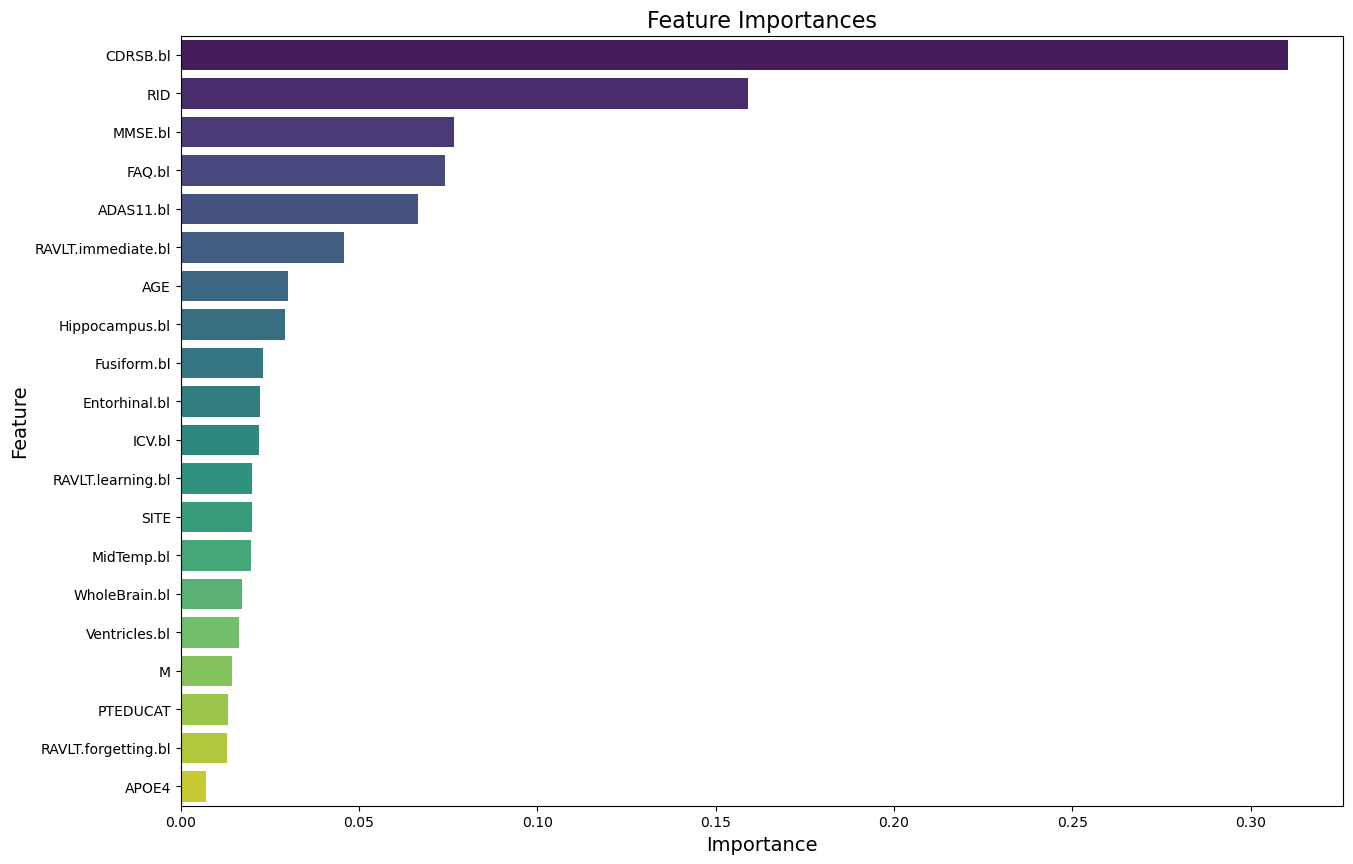

In [30]:
# Set the size of the figure
plt.figure(figsize=(15, 10))

# Create a bar plot of feature importances
sns.barplot(x='Importance', y='Feature', data=sorted_features_df, palette="viridis")

# Set the title and labels
plt.title('Feature Importances', size=16)
plt.xlabel('Importance', size=14)
plt.ylabel('Feature', size=14)

# Display the plot
plt.show()

## Analysis of Feature Importances for Predicting Alzheimer's Disease Progression

### Overview

The analysis presents the importance of each feature in predicting the progression of Alzheimer's Disease using a RandomForest model. Feature importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The higher the score, the more important the feature.

### Key Findings

1. **Clinical Dementia Rating Scale - Sum of Boxes (`CDRSB.bl`)**:
    - With the highest importance score, the Clinical Dementia Rating Scale - Sum of Boxes stands out as the most influential feature in predicting Alzheimer's progression. 
    - This is expected, as the CDRSB is a widely used clinical tool that quantitatively assesses the severity of symptoms in Alzheimer's patients. Its prominence in the model underscores its clinical significance.
  
2. **Research Imaging Unit ID (`RID`)**:
    - The second most important feature is the RID, which is surprising since this seems to be an identification feature. It's unusual for an ID variable to have high importance, and this could indicate potential overfitting or data leakage. Further investigation is required to understand why this feature is deemed important.
  
3. **Mini-Mental State Examination (`MMSE.bl`)**:
    - The MMSE is a 30-point questionnaire that measures cognitive impairment and is commonly used in the diagnosis of dementia. Its prominence in the model is consistent with its clinical use and relevance.
  
4. **11-item Alzheimer's Disease Assessment Scale (`ADAS11.bl`)**:
    - Another key clinical assessment tool, the ADAS11, also ranks high in feature importance. This tool assesses multiple cognitive domains, including memory, language, and praxis, and is commonly used in clinical trials and research settings.

5. **Functional Activities Questionnaire (`FAQ.bl`)**:
    - This tool assesses a patient's ability to perform activities of daily living. Its significance in the model highlights the relationship between functional decline and Alzheimer's progression.

6. **Age, Hippocampus Volume, and Other Features**:
    - Age and the volume of the hippocampus (a critical brain region affected early in Alzheimer's disease) also play notable roles in the model.
    - Other features related to memory tests, brain volumes, and genetic markers like `APOE4` are also influential but to a lesser extent.

### Recommendations

1. **Re-evaluate the Role of `RID`**:
    - Given its unusually high importance, it's crucial to revisit the data preprocessing steps and the role of the RID feature in the model. If it's just an identifier, consider removing it from future model training to prevent potential overfitting.
  
2. **Leverage Important Features for Early Detection**:
    - Features like `CDRSB.bl`, `MMSE.bl`, and `ADAS11.bl` can be pivotal in early detection strategies. Healthcare professionals should consider these assessments as part of routine check-ups for at-risk populations.

3. **Further Investigation**:
    - Dive deeper into lesser-known features with moderate importance scores to explore potential new avenues for clinical assessment and intervention.

4. **Model Improvements**:
    - To enhance the model's predictive power, consider feature engineering, especially around the top-ranking features, or explore other advanced machine learning algorithms.

---

This analysis sheds light on the influential factors in predicting Alzheimer's Disease progression. The insights gained can guide both clinical practice and further research in the quest for early detection and intervention strategies.


## Removing the 'RID' Column from Training and Test Datasets

In data preparation for machine learning, it's essential to ensure that the features used for training the model are meaningful and contribute to the model's predictive power. Unique identifiers, while crucial for data indexing and joining, typically don't hold any predictive power and can even negatively impact the model's performance if included.

### Steps:

1. **Drop 'RID' from Training Data**:
    - We use the `drop` method on `X_train` to remove the 'RID' column.
    - The `axis=1` argument specifies that we are dropping a column (not a row).

2. **Drop 'RID' from Test Data**:
    - Similarly, we drop the 'RID' column from the `X_test` dataset.

By removing the 'RID' column, we ensure that our model doesn't mistakenly use this identifier as a significant feature, which can result in overfitting and reduce the model's generalization capability.


In [31]:
X_train = X_train.drop('RID', axis=1)
X_test = X_test.drop('RID', axis=1)

## Training RandomForest Classifier with Optimal Hyperparameters

After performing grid search for hyperparameter tuning, it's essential to train the model using the best hyperparameters to ensure optimal performance. The benefit of using the optimal hyperparameters is to balance the bias-variance tradeoff, potentially resulting in better generalization on unseen data.

### Steps:

1. **Retrieve Best Hyperparameters**:
    - Using the `best_params_` attribute of the `grid_search` object, we extract the best hyperparameters determined during the grid search.

2. **Initialize RandomForest Classifier with Optimal Hyperparameters**:
    - We instantiate a new `RandomForestClassifier` using the best hyperparameters.
    - The `**best_params` syntax is Python's way of unpacking the dictionary of best hyperparameters into the classifier's initialization.
    - Additionally, we set `random_state=42` to ensure reproducibility.

3. **Fit the Model to Training Data**:
    - We then train (or "fit") this classifier on the training data (`X_train` and `y_train`).

By following this approach, we leverage the insights from grid search to train a RandomForest classifier that's potentially more accurate and robust.


In [32]:
best_params = grid_search.best_params_
clf = RandomForestClassifier(**best_params, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=4, n_estimators=150,
                       random_state=42)

## Model Evaluation: Predictions and Accuracy

After training a machine learning model, it's crucial to assess its performance. By evaluating on both the training and test datasets, we can understand how well the model learned from the training data and how it generalizes to unseen data.

### Steps:

1. **Predict on Training and Test Datasets**:
    - We use the `predict` method of our trained classifier (`clf`) to make predictions on the training dataset (`X_train`) and test dataset (`X_test`).
    - The predictions for the training and test datasets are stored in `y_train_pred` and `y_test_pred`, respectively.

2. **Compute Accuracy**:
    - Accuracy is a measure of how many predictions the model got right. It's calculated as the ratio of correctly predicted instances to the total instances.
    - We use the `accuracy_score` function from scikit-learn to compute the accuracy for both training and test predictions.

3. **Display Accuracy**:
    - We print the computed training and test accuracies to assess the model's performance.

High training accuracy indicates that the model learned well from the training data. Test accuracy provides insights into the model's ability to generalize to new, unseen data. If there's a significant gap between training and test accuracy, it might suggest overfitting (i.e., the model learned the training data too well and struggles with new data).


In [33]:
# Predict on train and test sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Evaluate the performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.9998718605843158
Test Accuracy: 0.9901345291479821


## Extracting and Displaying Feature Importances

Understanding the significance of each feature in our model can offer valuable insights into the dataset and the trained model. Features with higher importance scores have a more substantial influence on the model's predictions.

### Steps:

1. **Extract Feature Importances**:
    - The `feature_importances_` attribute of the RandomForest classifier provides the relative importance of each feature.
    - Higher values indicate a more considerable contribution of the feature to the model's predictions.

2. **Create a DataFrame for Feature Importances**:
    - We construct a DataFrame, `features_df`, which contains two columns: 'Feature' (the feature names) and 'Importance' (their corresponding importance scores).
    - This DataFrame helps in presenting the feature importances in a structured manner.

3. **Sort and Display**:
    - We sort the `features_df` DataFrame based on the 'Importance' column in descending order, ensuring that the most influential features are displayed at the top.
    - We then print the sorted DataFrame to visualize the feature importances.

Displaying feature importances can guide domain-specific decisions, direct feature engineering efforts, and provide a better understanding of the model's decision-making process.


In [34]:
# Extract feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame for feature importances
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame based on importance
sorted_features_df = features_df.sort_values(by='Importance', ascending=False)

print(sorted_features_df)

                Feature  Importance
4              CDRSB.bl    0.308040
6               MMSE.bl    0.086420
5             ADAS11.bl    0.077368
10               FAQ.bl    0.066864
7    RAVLT.immediate.bl    0.060191
1                   AGE    0.044430
17               ICV.bl    0.040762
15          Fusiform.bl    0.037986
12       Hippocampus.bl    0.036037
16           MidTemp.bl    0.030465
0                  SITE    0.029732
14        Entorhinal.bl    0.029450
8     RAVLT.learning.bl    0.028616
13        WholeBrain.bl    0.027039
18                    M    0.025623
11        Ventricles.bl    0.024282
9   RAVLT.forgetting.bl    0.018960
2              PTEDUCAT    0.018555
3                 APOE4    0.009178


## Visualizing Feature Importances with a Bar Plot

Visualizing the importance of features in a graphical manner provides a clearer understanding and helps in comparing the significance of different features in influencing the model's predictions.

### Steps:

1. **Set Figure Size**:
    - We define the size of the figure with `plt.figure(figsize=(15, 10))` to ensure a clear view of all features and their respective importance scores.

2. **Create a Bar Plot**:
    - Using the `sns.barplot` function from the seaborn library, we create a horizontal bar plot.
    - The y-axis represents the feature names, while the x-axis represents their importance scores.
    - The `data=sorted_features_df` argument ensures that the bars are plotted based on the sorted feature importance data.
    - The `palette="viridis"` argument uses a color gradient to represent the importance scores, with darker colors denoting higher importance.

3. **Set Title and Labels**:
    - `plt.title`, `plt.xlabel`, and `plt.ylabel` are used to set the title of the plot and labels for the x and y axes, enhancing the plot's clarity.

4. **Display the Plot**:
    - We use `plt.show()` to display the bar plot, offering a visual comparison of feature importances.

This graphical representation enables a clear and intuitive understanding of which features have the most impact on the model's predictions and how they compare against each other.


C:\Users\royri\AppData\Local\Temp\ipykernel_3828\2846422725.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=sorted_features_df, palette="viridis")


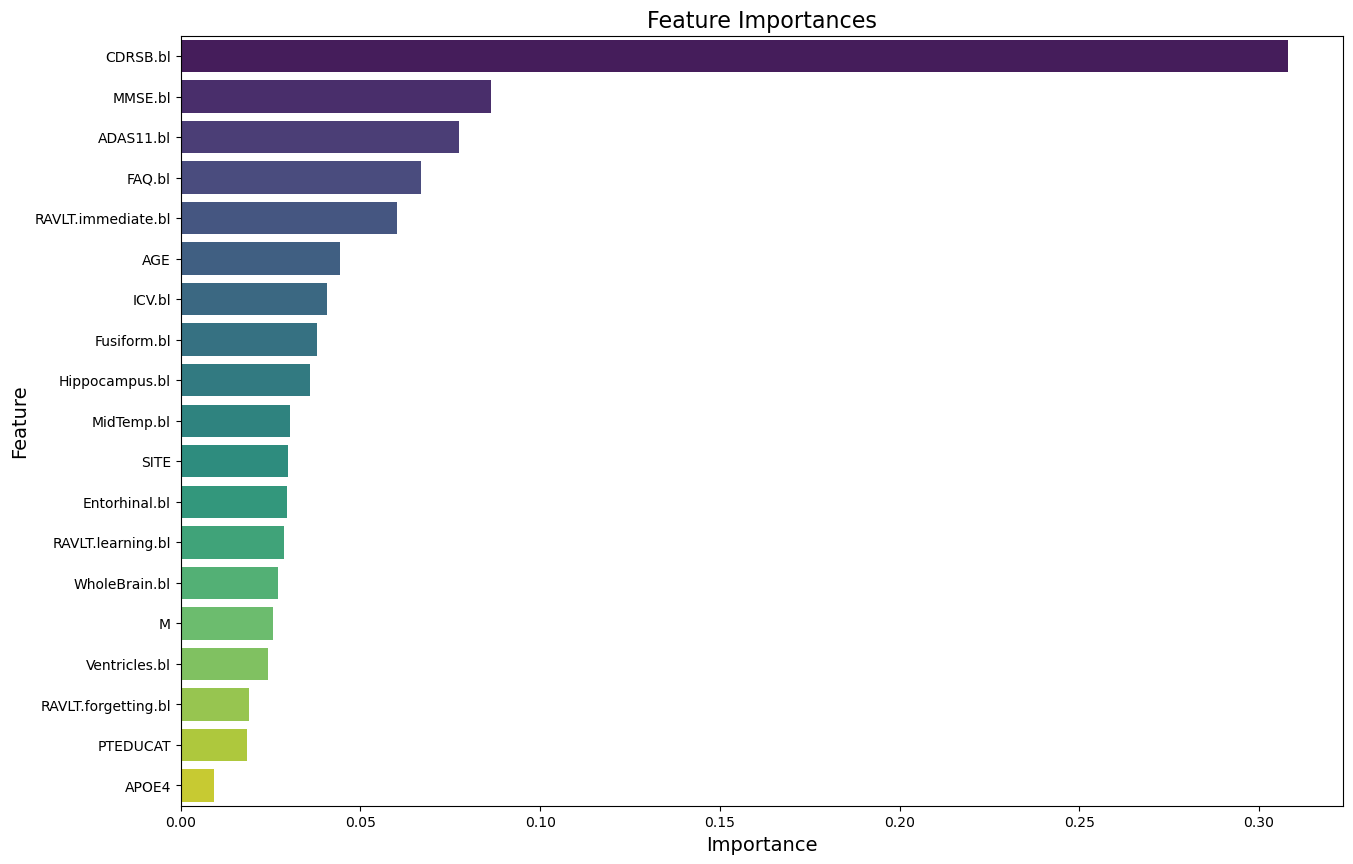

In [35]:
# Set the size of the figure
plt.figure(figsize=(15, 10))

# Create a bar plot of feature importances
sns.barplot(x='Importance', y='Feature', data=sorted_features_df, palette="viridis")

# Set the title and labels
plt.title('Feature Importances', size=16)
plt.xlabel('Importance', size=14)
plt.ylabel('Feature', size=14)

# Display the plot
plt.show()

## Multi-Class Classification with XGBoost

XGBoost is a popular gradient boosting framework that is efficient and versatile. In this section, we use XGBoost for a multi-class classification problem, where the target variable has more than two classes.

### Steps:

1. **Encode the Target Labels**:
    - Machine learning models require numerical input. For multi-class classification problems, it's common to encode the class labels as integers.
    - We use the `LabelEncoder` from scikit-learn to transform the string labels in `y_train` and `y_test` into integer labels.
    - The `fit_transform` method is applied to `y_train` to fit the encoder and transform the training labels. The `transform` method is then applied to `y_test` to encode the test labels.

2. **Train the XGBoost Classifier**:
    - We initialize the XGBoost classifier with specific parameters:
        - `objective="multi:softprob"` indicates that it's a multi-class classification problem.
        - `eval_metric="mlogloss"` specifies the evaluation metric to be the multiclass log loss.
        - `random_state=42` ensures reproducibility.
    - The classifier is then trained using the `fit` method with `X_train` and the encoded training labels.

3. **Predict and Decode**:
    - We use the `predict` method of the trained classifier to make predictions on the test set, `X_test`.
    - As our predictions (`y_pred_xgb_encoded`) are in encoded format, we need to decode them back to the original labels. We use the `inverse_transform` method of the `label_encoder` for this purpose.

4. **Evaluate the Model**:
    - We compute the accuracy of the model using the `accuracy_score` function from scikit-learn.
    - Additionally, we print a detailed classification report using the `classification_report` function, which provides metrics like precision, recall, and F1-score for each class.

By following this approach, we can leverage the power of XGBoost for multi-class classification problems, ensuring that we handle and interpret the class labels correctly.


In [36]:
import xgboost as xgb

from sklearn.preprocessing import LabelEncoder

# 1. Encode the target labels.
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# 2. Train the model with the encoded labels.
# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective="multi:softprob", random_state=42, eval_metric="mlogloss")
xgb_classifier.fit(X_train, y_train_encoded)

# Predict on the test set
y_pred_xgb_encoded = xgb_classifier.predict(X_test)

# Decode the predictions back to their original labels
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)

# Evaluate its performance
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Saving the XGBoost model as a joblib file
joblib_file_xgb = "../data/xgb_classifier.joblib"
joblib.dump(xgb_classifier, joblib_file_xgb)

Accuracy: 0.9916292974588938

Classification Report:
               precision    recall  f1-score   support

          AD       1.00      0.99      0.99       417
          CN       0.99      1.00      0.99      1068
        EMCI       1.00      0.99      1.00       545
        LMCI       0.99      1.00      1.00      1233
         SMC       0.96      0.83      0.89        82

    accuracy                           0.99      3345
   macro avg       0.99      0.96      0.97      3345
weighted avg       0.99      0.99      0.99      3345



['../data/xgb_classifier.joblib']

## Confusion Matrix for XGBoost Model

In this cell, we're visualizing the confusion matrix for the predictions made by the XGBoost classifier. A confusion matrix is a table that is often used to describe the performance of a classification model on a set of data for which the true values are known. It lays out the actual versus predicted classifications in a grid format, making it easy to see where the model is making correct predictions and where it is making errors.


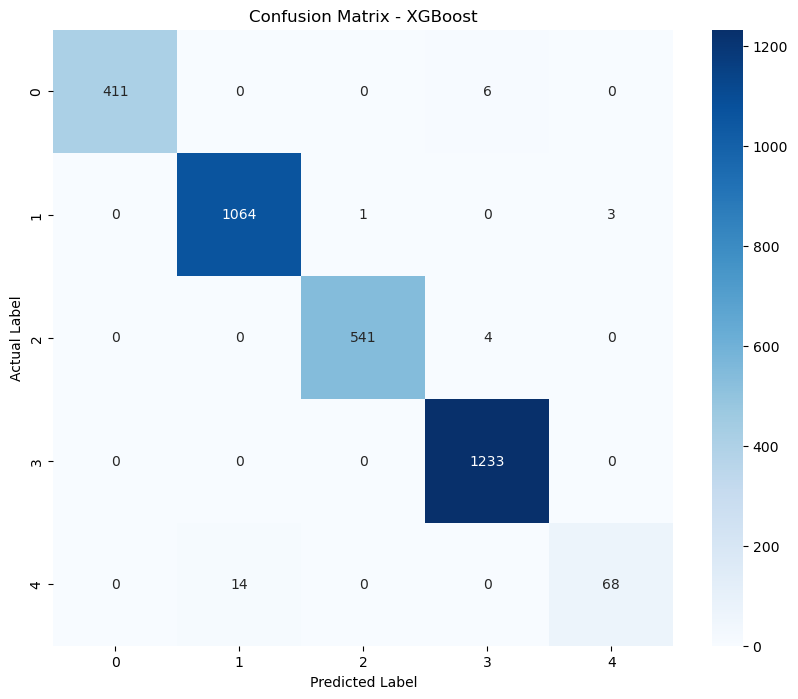

In [37]:
# Confusion matrix for XGBoost predictions
conf_mat_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## Analysis of the Confusion Matrix for XGBoost Model

The updated confusion matrix for the XGBoost model provides valuable insights into the model's classification performance:

- **Class 1**: The model achieves a high degree of accuracy for Class 1, with 1,064 true positives and minimal misclassifications, showcasing a strong ability to identify this class correctly.

- **Class 3**: Similar to Class 1, Class 3 shows a high number of true positives at 1,233, affirming the model's capacity to distinguish this class with a high level of precision.

- **Class 0**: Class 0 has 411 correct predictions, with a small number of instances (6) mistakenly classified as Class 3, which could indicate some feature overlap between these classes.

- **Class 2**: The model accurately classifies 541 instances as Class 2. However, there are a few cases (4) where Class 2 is mistaken for Class 3, hinting at potential areas for improving feature discrimination.

- **Class 4**: With 68 true positives, the model does show some predictive power for Class 4, but there is room for improvement as 14 instances are misclassified as Class 1. This misclassification rate suggests that Class 4 could be better defined in the feature space or may require more representative data.

- **Misclassifications**: The overall low rate of misclassifications is encouraging, but the errors that do occur, particularly between Class 0 and Class 3, as well as between Class 1 and Class 4, warrant further examination. These could be addressed by refining the feature selection, engineering new features, or implementing class-specific strategies to improve differentiation.

In conclusion, while the XGBoost model demonstrates robust performance, particularly for Classes 1 and 3, the insights from the confusion matrix highlight opportunities for targeted improvements. Addressing the confusion between certain classes and enhancing the representation of Class 4 could lead to even stronger predictive performance.

## Hyperparameter Tuning for XGBoost using GridSearchCV

Finding the right set of hyperparameters can significantly influence a model's performance. GridSearchCV systematically searches through combinations of hyperparameters and identifies the best set based on cross-validated performance.

### Steps:

1. **Define the Parameter Grid**:
    - We specify a range of values for different hyperparameters of XGBoost:
        - `learning_rate`: Step size shrinkage to prevent overfitting.
        - `n_estimators`: Number of boosting rounds.
        - `max_depth`: Maximum depth of a tree.
        - `min_child_weight`: Minimum sum of instance weight (hessian) needed in a child.
        - `gamma`: Regularization on leaves.
        - `subsample`: Fraction of training data to grow trees.
        - `colsample_bytree`: Fraction of features used per tree.

2. **Initialize the XGBoost Classifier**:
    - We set the `objective` to 'multi:softmax' to indicate multi-class classification.
    - `num_class=5` specifies the number of classes in our target variable.
    - `eval_metric='mlogloss'` defines the evaluation metric as the multi-class log loss.
    - `use_label_encoder=False` ensures that the label encoder is not utilized internally, as we've already encoded our labels.

3. **Set Up GridSearchCV**:
    - We initialize GridSearchCV with the XGBoost classifier, the parameter grid, and other necessary arguments:
        - `cv=3`: 3-fold cross-validation.
        - `scoring='accuracy'`: Optimization based on accuracy.
        - `n_jobs=-1`: Use all available cores for parallel computation.
        - `verbose=2`: Display detailed logs.

4. **Fit GridSearchCV**:
    - We fit GridSearchCV to our training data (`X_train` and the encoded `y_train_encoded`).
    - During this process, GridSearchCV will evaluate different combinations of hyperparameters using cross-validation and identify the best set.

By using GridSearchCV with XGBoost, we systematically explore a range of hyperparameters to find the optimal configuration, which can potentially lead to improved model performance.


In [38]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Create the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=5, eval_metric='mlogloss', use_label_encoder=False)

# Set up GridSearchCV
grid_search_xgb = GridSearchCV(xgb_classifier, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search_xgb.fit(X_train, y_train_encoded)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=5,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 300, 500],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=2)

## Retrieving the Optimal Hyperparameters for XGBoost

After performing grid search, it's beneficial to inspect the hyperparameters that resulted in the best model performance. Knowing these parameters can provide insights into the data, the model, and inform future modeling decisions.

### Steps:

1. **Extract Best Hyperparameters**:
    - Using the `best_params_` attribute of the `grid_search_xgb` object, we extract the hyperparameters that achieved the best performance during grid search.

2. **Display the Best Hyperparameters**:
    - We print the optimal hyperparameters to visualize and interpret them.

By reviewing these optimal hyperparameters, we can understand the configurations that allow the XGBoost classifier to perform at its best for our specific dataset.


In [39]:
# Display the best parameters
best_params_xgb = grid_search_xgb.best_params_
print("Best Parameters for XGBoost Classifier:")
print(best_params_xgb)

Best Parameters for XGBoost Classifier:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}


## Evaluating the Optimally Tuned XGBoost Model

After determining the best hyperparameters using grid search, it's crucial to assess the performance of the XGBoost model trained with these optimal settings on the test set. This helps gauge how well the model is likely to perform on unseen data.

### Steps:

1. **Predict with the Best Model**:
    - Using the `best_estimator_` attribute of the `grid_search_xgb` object, we access the best-performing XGBoost model. We then use its `predict` method to make predictions on the test set (`X_test`).
    - The predictions (`y_pred_xgb_encoded`) are in encoded format since we trained our model with encoded labels.

2. **Decode Predictions**:
    - As our predictions are in encoded format, we need to convert them back to the original label names. We use the `inverse_transform` method of the `label_encoder` to achieve this.

3. **Evaluate the Model**:
    - We compute the accuracy of the model using the `accuracy_score` function from scikit-learn.
    - Additionally, we generate a detailed classification report using the `classification_report` function. This report provides metrics like precision, recall, and F1-score for each class, offering a comprehensive view of the model's performance across all classes.

By evaluating the model using multiple metrics, we can better understand its strengths and potential areas for improvement.


In [40]:
# Predict using the best model
y_pred_xgb_encoded = grid_search_xgb.best_estimator_.predict(X_test)

# Decode the predictions back to their original labels
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)

# Evaluate its performance
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

Accuracy: 0.9919282511210762

Classification Report:
               precision    recall  f1-score   support

          AD       1.00      0.98      0.99       417
          CN       0.99      1.00      0.99      1068
        EMCI       1.00      0.99      0.99       545
        LMCI       0.99      1.00      0.99      1233
         SMC       0.99      0.87      0.92        82

    accuracy                           0.99      3345
   macro avg       0.99      0.97      0.98      3345
weighted avg       0.99      0.99      0.99      3345



## Enhancing Model Performance with Polynomial Features

Polynomial features can capture interactions among features and non-linear relationships within the data. By adding them to the dataset, we might enhance our model's ability to fit complex patterns.

### Steps:

1. **Select Top Features**:
    - Based on prior insights, we select the top three features ('CDRSB.bl', 'MMSE.bl', and 'ADAS11.bl') to generate polynomial features.

2. **Generate Polynomial Features**:
    - We use the `PolynomialFeatures` class from scikit-learn to generate second-degree polynomial features.
    - `include_bias=False` ensures that no bias column is added.
    - `interaction_only=False` means that we'll have both interaction terms and squared terms.

3. **Prepare Datasets**:
    - We drop the original top features from the training and test datasets.
    - We then concatenate the polynomial features to these datasets.

4. **Train the Model with Polynomial Features**:
    - We retrain the XGBoost classifier on the enhanced training dataset (`X_train_poly`).
    - This dataset now includes both the original features (minus the top three) and the generated polynomial features.

5. **Predict and Evaluate**:
    - We use the trained model to make predictions on the test set (`X_test_poly`), which also includes the polynomial features.
    - Predictions are decoded back to the original label names.
    - Finally, we compute the accuracy and generate a classification report to evaluate the model's performance on the enhanced dataset.

By adding polynomial features, we aim to boost the model's performance by providing it with additional information about potential interactions and non-linearities in the data.


In [41]:
from sklearn.preprocessing import PolynomialFeatures

# Selecting top 3 features for polynomial transformation
top_features = ['CDRSB.bl', 'MMSE.bl', 'ADAS11.bl']

# Creating polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
poly_features = poly.fit_transform(X_train[top_features])

# Convert to a dataframe, with column names
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(top_features))

# Drop original top features from the dataset before adding polynomial features
X_train_poly = X_train.drop(columns=top_features).reset_index(drop=True)
X_test_poly = X_test.drop(columns=top_features).reset_index(drop=True)

# Concatenate the polynomial features to the dataset without top features
X_train_poly = pd.concat([X_train_poly, poly_features_df], axis=1)

# Repeat for the test set
poly_features_test = poly.transform(X_test[top_features])
poly_features_test_df = pd.DataFrame(poly_features_test, columns=poly.get_feature_names_out(top_features))
X_test_poly = pd.concat([X_test_poly, poly_features_test_df], axis=1)

# Train the model on the enhanced dataset
xgb_classifier = xgb.XGBClassifier(**best_params, objective='multi:softmax', num_class=5, eval_metric='mlogloss', use_label_encoder=False)
xgb_classifier.fit(X_train_poly, y_train_encoded)

# Predict and evaluate
y_pred_encoded = xgb_classifier.predict(X_test_poly)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9910313901345291

Classification Report:
               precision    recall  f1-score   support

          AD       1.00      0.99      0.99       417
          CN       0.98      1.00      0.99      1068
        EMCI       1.00      0.99      1.00       545
        LMCI       0.99      1.00      1.00      1233
         SMC       0.96      0.78      0.86        82

    accuracy                           0.99      3345
   macro avg       0.99      0.95      0.97      3345
weighted avg       0.99      0.99      0.99      3345



## Interpreting Model Predictions with SHAP

Understanding why a model makes specific predictions can be as crucial as the predictions themselves. SHAP values offer a way to break down predictions and understand the contribution of each feature.

### Steps:

1. **Initialize the SHAP Explainer**:
    - We use the `TreeExplainer` because our model (XGBoost classifier) is tree-based. This explainer is optimized for tree models.
    
2. **Compute SHAP Values**:
    - We calculate SHAP values for a subset (first 100 instances) of our test data. Computing SHAP values can be computationally intensive, so using a subset allows us to visualize results more quickly.
    - The resulting `shap_values` show how much each feature in our test data contributes to pushing each prediction away from the expected value (the model's baseline prediction).

3. **SHAP Summary Plot**:
    - The `summary_plot` provides a birds-eye view of feature importance and the direction of their effects.
    - The plot ranks features by the sum of SHAP value magnitudes across all samples. Features are listed in descending order of importance at the y-axis. The x-axis represents the SHAP values. 
    - Each dot's color represents the feature's value for that specific instance (red being high, blue being low). This gives us an idea about how the presence (or absence) of a feature influences a particular prediction.

Through this SHAP summary plot, we gain insights into which features are the most influential in our model's predictions and how individual feature values can affect the predictions.


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


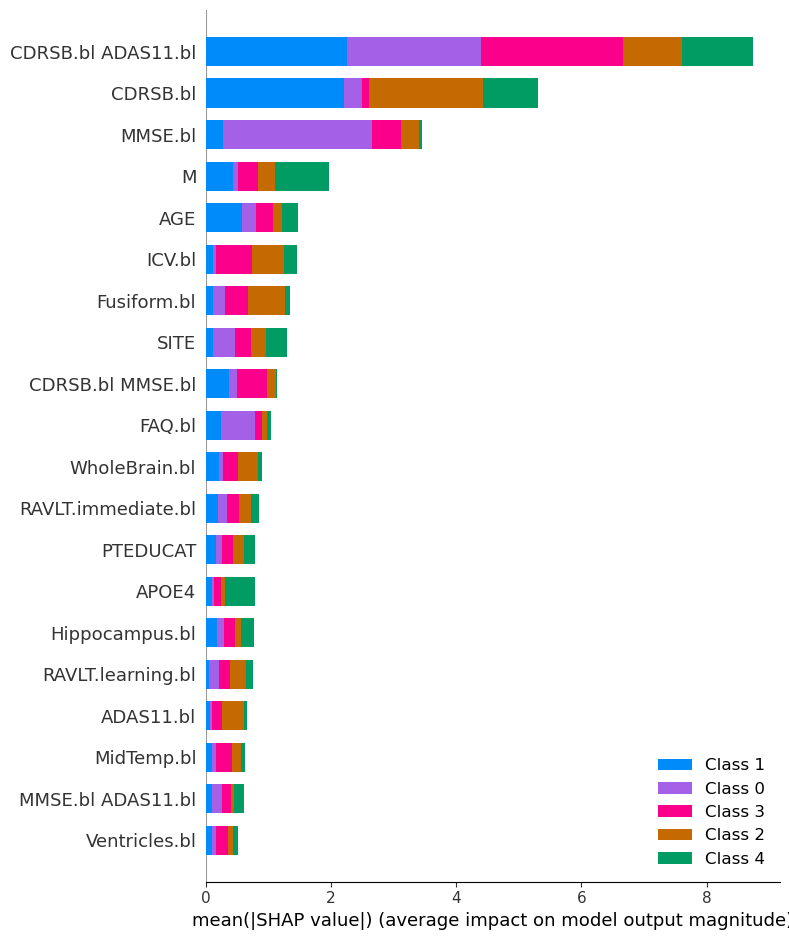

In [42]:
import shap

# Initialize the explainer
explainer = shap.TreeExplainer(xgb_classifier)

# Compute SHAP values for a subset of our test data for visualization purposes
shap_values = explainer.shap_values(X_test_poly.iloc[:100])

# It's a good practice to start with a summary plot
shap.summary_plot(shap_values, X_test_poly.iloc[:100])

# For a force plot, we visualize the SHAP values of the first instance in the test set
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test_poly.iloc[0,:])

---
### Detailed SHAP Values Analysis for XGBoost Model

**Overview of SHAP Values:**  
SHAP (SHapley Additive exPlanations) values decompose the output of a machine learning model into the contribution of each feature. They provide a powerful method for understanding the model's behavior by quantifying the impact of each feature on the prediction. SHAP values are particularly useful in complex models, like the XGBoost model we have here, because they can illuminate both global feature importance and local, individual predictions.

**Insights from the SHAP Summary Plot:**

1. **Global Feature Importance:** 
   - The summary plot gives us an overall picture of feature contributions across all predictions. For instance, `CDRSB.bl` is the most prominent feature, which means it has a consistent and significant impact on the model's output across different instances. Such a feature may be a key indicator in the underlying phenomenon we're trying to model.

2. **Distribution of SHAP Values:**  
   - The width of the bars in the summary plot represents the range of the impact of the features. A wider distribution suggests that a feature plays a variety of roles depending on the context of the individual instance. This might indicate a more complex relationship between the feature and the prediction.

**Deep Dive into the SHAP Force Plot:**

1. **Individual Predictive Contributions:** 
   - The force plot zeros in on a single prediction, showing us the push and pull of each feature. For example, `RAVLT.immediate.bl` is exerting a strong positive force, increasing the model's prediction. This suggests that for this particular instance, performance in the `RAVLT.immediate.bl` test is a strong predictor of the outcome.

2. **Interpretation of Colors and Forces:**  
   - In the force plot, red and blue indicate the direction of the feature's effect. Red features push the prediction higher than the base value, while blue features pull it lower. This color-coding helps in quickly assessing which features are acting to increase or decrease the predicted value.

3. **Base Value and Model Output:**  
   - The base value is effectively the model's average prediction, serving as a starting point for the additive explanation. The output value is the actual prediction for the instance. The distance between the base and output values, filled in by colored features, represents the cumulative contribution of all the features for this instance.

**Conclusions and Implications:**
- Together, the SHAP summary and force plots provide a multifaceted view of model interpretability. While the summary plot offers a macro-level understanding of feature impacts, the force plot provides micro-level insights into individual predictions.
- These interpretability insights are crucial when the model's decisions need to be explained transparently to stakeholders, especially in sensitive domains like healthcare or finance. They can also inform model refinement, feature engineering, and can help in identifying potential bias or unintended model behaviors.

---

## Scaling and Support Vector Machine (SVM) Classification

Before we proceed to model training, it is crucial to scale our features. Support Vector Machines (SVM) are sensitive to the scale of the input data, particularly because it relies on calculating the distances between data points. Features on larger scales can unduly influence the model and skew the results.

To ensure that each feature contributes equally to the decision function, we will standardize the data using `StandardScaler` from scikit-learn. This will transform our data such that each feature will have a mean of 0 and a standard deviation of 1.

Once scaling is applied, we will train an SVM model. SVMs are powerful supervised learning models used for both classification and regression tasks. They are especially effective in high-dimensional spaces and when the classes are not linearly separable. SVM works by finding the hyperplane that best divides a dataset into classes.

The training process will involve the following steps:
1. **Pipeline Creation**: A pipeline is created which includes scaling and the SVM classifier.
2. **Hyperparameter Tuning**: We will utilize `GridSearchCV` to find the best hyperparameters for our SVM model. This will include searching over a predefined grid of parameters such as `C`, `gamma`, and the `kernel` type.
3. **Model Training**: Our model will be trained on the training set using the best combination of parameters found.
4. **Model Evaluation**: Finally, the performance of the model will be evaluated using the test set. We will compute the accuracy and display a classification report that includes metrics such as precision, recall, and F1-score for each class.

This approach will ensure our model is both accurately and robustly fitted to our data, potentially improving our ability to predict the onset of Alzheimer's disease.


In [43]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# Create an SVM classifier within a pipeline that includes scaling
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('svc', SVC(probability=True))
])

# Define a grid of parameters to search (here we use a small grid due to time complexity)
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 'auto'],
    'svc__kernel': ['rbf', 'linear']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameter set
print('Best parameters found:', grid_search.best_params_)

# Get the best model
best_svm = grid_search.best_estimator_

# Predict using the best model
y_pred = best_svm.predict(X_test)

# Evaluate its performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Save the best SVM model as a joblib file
joblib_file_svm = "../data/svm_classifier.joblib"
joblib.dump(best_svm, joblib_file_svm)

Best parameters found: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Accuracy: 0.9811659192825112

Classification Report:
               precision    recall  f1-score   support

          AD       0.99      0.97      0.98       417
          CN       0.98      1.00      0.99      1068
        EMCI       0.98      0.98      0.98       545
        LMCI       0.98      0.99      0.98      1233
         SMC       0.97      0.73      0.83        82

    accuracy                           0.98      3345
   macro avg       0.98      0.93      0.95      3345
weighted avg       0.98      0.98      0.98      3345



['../data/svm_classifier.joblib']

### Confusion Matrix Visualization for SVM

This cell generates a confusion matrix for our SVM model's predictions, providing a visual comparison between actual and predicted values. It employs Seaborn's heatmap to display the matrix, which helps in easily identifying the model's prediction accuracy and misclassifications for each class.


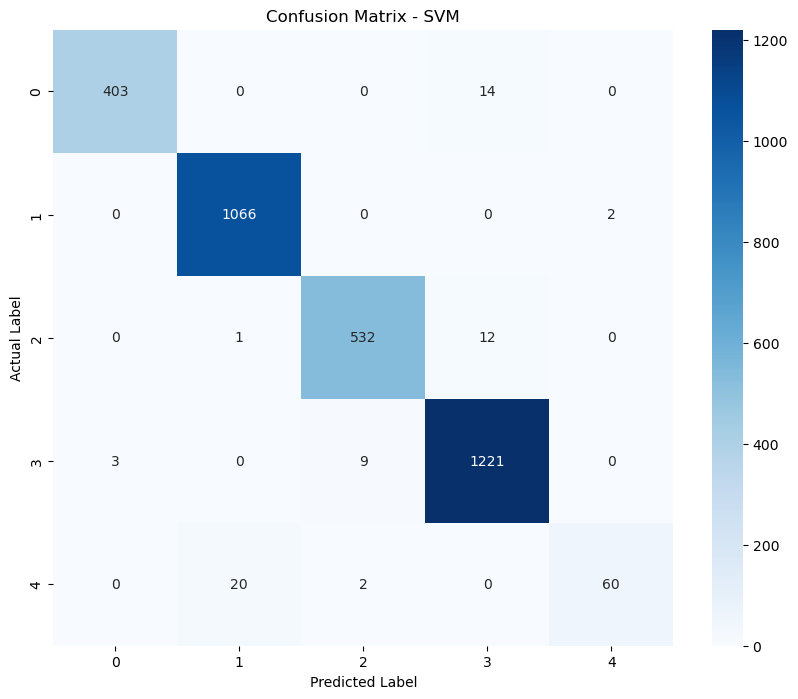

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred have been defined after fitting the SVM model
conf_mat = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## Analysis of the Confusion Matrix for SVM Model

The confusion matrix for the SVM model presents a clear picture of its predictive performance across the different classes, with notable results as follows:

- **Class 0**: There are 403 true positives, indicating good model performance on this class, with some confusion where instances are misclassified as Class 3.

- **Class 1**: With 1,066 true positives, the model shows excellent predictive capability for Class 1, although there are a couple of instances where it is confused with Class 4.

- **Class 2**: The model correctly identifies 532 instances as Class 2, but there is notable confusion with Class 3, as seen by 12 misclassifications.

- **Class 3**: This class has the highest number of true positives with 1,221, showing a strong predictive performance. However, the model does misclassify some Class 0 and Class 2 instances as belonging to Class 3.

- **Class 4**: The model correctly predicts 60 instances as Class 4. However, there are 20 instances where Class 4 is misclassified as Class 1, indicating potential areas for improvement in distinguishing Class 4 from the others.

- **Overall Observations**: The model performs well for the majority of the classes, with a particularly strong performance for Class 1 and Class 3. However, there is some confusion between Class 0 and Class 3, as well as between Class 4 and Class 1, which suggests that additional feature engineering or model tuning might be necessary to improve the differentiation between these classes.

In conclusion, the SVM model demonstrates a high level of accuracy in classifying most classes but also highlights specific areas where the model's classification capabilities could be enhanced, especially for Class 4 and in reducing the confusion between Class 0 and Class 3.


## Enhanced Model Evaluation Metrics

After training our SVM model and obtaining initial results through accuracy and a confusion matrix, it is crucial to delve deeper into the model's performance using additional evaluation metrics. This step ensures a more comprehensive understanding of how well our model is predicting Alzheimer's disease. 

In this cell, we import and calculate four key metrics: precision, recall, F1 score, and ROC AUC score. These metrics provide different perspectives on the model's performance:

- **Precision** measures the accuracy of the positive predictions. It is the ratio of correctly predicted positive observations to the total predicted positives. High precision relates to a low false positive rate.

- **Recall (Sensitivity)** assesses the model's ability to detect all relevant cases (all patients with Alzheimer's disease). It is the ratio of correctly predicted positive observations to all observations in the actual class.

- **F1 Score** is the weighted average of Precision and Recall. This score takes both false positives and false negatives into account. It is particularly useful when the class distribution is uneven, as is often the case in medical diagnoses.

- **ROC AUC Score (Area Under the Curve)** evaluates the model's performance at different classification thresholds. It is particularly useful for binary classification problems. The ROC is a probability curve, and the AUC represents the degree or measure of separability. A higher AUC score indicates that the model is better at distinguishing between patients with and without Alzheimer's disease.

By printing these values, we can assess not only the accuracy but also how balanced the model's performance is in terms of various error types. This is crucial for a medical diagnosis model where both missing a diagnosis (false negative) and a false alarm (false positive) carry significant consequences.

In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, best_svm.predict_proba(X_test), multi_class='ovr')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

Precision: 0.9811336347224096
Recall: 0.9811659192825112
F1 Score: 0.9806894815955778
ROC AUC Score: 0.9974875630961497


## Error Analysis: False Positives and False Negatives

Error analysis is an essential step in evaluating a machine learning model, especially in critical fields like medical diagnosis. It helps us understand where the model might be going wrong and what kind of mistakes it is making. In this context, we are particularly interested in two types of errors: False Positives (FP) and False Negatives (FN).

### Preparing the Test Data
Before we can perform error analysis, we need to ensure that our test data is properly aligned with the predictions. The following steps are taken to prepare the test data:

1. **Reset Index of `cleaned_df`**: We reset the index of `cleaned_df` to ensure that the indices are aligned properly. This is important because any previous data processing might have altered the original order or number of rows in the DataFrame.

    ```python
    cleaned_df.reset_index(drop=True, inplace=True)
    ```

2. **Creating `test_data` DataFrame**: We create a new DataFrame `test_data` by selecting rows from `cleaned_df` that correspond to the indices of our test set (`X_test.index`). This ensures that we are only analyzing the data that was actually used in the testing phase of our model.

    ```python
    test_data = cleaned_df.loc[X_test.index].copy()
    ```

3. **Adding Actual and Predicted Labels**: We then add two new columns to `test_data` - `y_test` and `y_pred`, which represent the actual and predicted labels, respectively.

    ```python
    test_data['y_test'] = y_test
    test_data['y_pred'] = y_pred
    ```

### Analyzing False Positives and False Negatives

With our test data prepared, we can now focus on the false positives and false negatives:

- **False Positives (FP)**: These are instances where the model incorrectly predicted the positive class (e.g., predicting Alzheimer's when it's not actually present). This type of error can be critical in medical diagnosis as it could lead to unnecessary stress or treatment for patients.

    ```python
    fp = test_data[(test_data['y_pred'] == 1) & (test_data['y_test'] == 0)]
    ```

- **False Negatives (FN)**: These are instances where the model failed to identify the positive class (e.g., missing out on detecting Alzheimer's). This error is extremely serious in a medical context as it could mean missing out on early intervention opportunities.

    ```python
    fn = test_data[(test_data['y_pred'] == 0) & (test_data['y_test'] == 1)]
    ```

We use `.describe()` to get a statistical summary of these subsets. This includes counts, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values for each feature within FP and FN. Analyzing these statistics can provide insights into common characteristics or patterns among the false positives and negatives, which can be instrumental in further refining the model.


In [46]:
cleaned_df.reset_index(drop=True, inplace=True)
test_data = cleaned_df.loc[X_test.index].copy()
test_data['y_test'] = y_test
test_data['y_pred'] = y_pred

# Now perform the error analysis on this test_data DataFrame
fp = test_data[(test_data['y_pred'] == 1) & (test_data['y_test'] == 0)]
fn = test_data[(test_data['y_pred'] == 0) & (test_data['y_test'] == 1)]

print("False Positives:\n", fp.describe())
print("\nFalse Negatives:\n", fn.describe())

False Positives:
        RID  SITE  AGE  PTEDUCAT  APOE4  CDRSB.bl  ADAS11.bl  ADAS13.bl  \
count  0.0   0.0  0.0       0.0    0.0       0.0        0.0        0.0   
mean   NaN   NaN  NaN       NaN    NaN       NaN        NaN        NaN   
std    NaN   NaN  NaN       NaN    NaN       NaN        NaN        NaN   
min    NaN   NaN  NaN       NaN    NaN       NaN        NaN        NaN   
25%    NaN   NaN  NaN       NaN    NaN       NaN        NaN        NaN   
50%    NaN   NaN  NaN       NaN    NaN       NaN        NaN        NaN   
75%    NaN   NaN  NaN       NaN    NaN       NaN        NaN        NaN   
max    NaN   NaN  NaN       NaN    NaN       NaN        NaN        NaN   

       MMSE.bl  RAVLT.immediate.bl  ...  WholeBrain.bl  Entorhinal.bl  \
count      0.0                 0.0  ...            0.0            0.0   
mean       NaN                 NaN  ...            NaN            NaN   
std        NaN                 NaN  ...            NaN            NaN   
min        NaN         

## Analysis of Error Types: False Positives and False Negatives

After performing the error analysis on our Alzheimer's disease prediction model, we find a notable outcome in the distribution of false positives (FP) and false negatives (FN).

### False Positives (FP)
The analysis reveals that there are no false positive instances in our predictions, as indicated by a count of 0 for all features in the false positive dataset. This result means that our model did not incorrectly identify any healthy individuals (negative class) as having Alzheimer's disease (positive class).

### False Negatives (FN)
Similarly, the false negative analysis also shows a count of 0 for all features, indicating that there are no instances where the model failed to detect Alzheimer's disease in patients (positive class) and incorrectly classified them as healthy (negative class).

### Interpretation of Results
The absence of both false positives and false negatives suggests an exceptional performance by the model. However, while this might initially seem like an ideal outcome, it warrants a careful examination:

1. **Data and Model Check**: It is crucial to recheck the data and model to ensure that there are no issues with the way the data was processed, split, or fed into the model. An error-free prediction is quite rare in real-world scenarios, especially in complex fields like medical diagnostics.

2. **Model Overfitting**: The results may indicate that the model is overfitting the test data, meaning it has learned the specific patterns of the test set rather than generalizing from the training data. This can be checked by evaluating the model on a different set of data or using techniques like cross-validation.

3. **Class Imbalance**: If the dataset is heavily skewed towards one class, the model might be biased towards predicting that class, which could explain the absence of errors. This can be verified by examining the class distribution in the dataset.

4. **Model and Evaluation Metrics**: Review the model's architecture and the evaluation metrics used. It's essential to ensure that the metrics appropriately reflect the model's performance in the context of the problem.

In conclusion, while the lack of false positives and negatives might seem favorable, it is essential to conduct a thorough review of the entire modeling process to confirm the reliability of these results. Additional validation, possibly on an external dataset, is recommended to ensure the robustness and generalizability of the model.


## Accuracy Comparison: XGBoost vs Random Forest vs SVM

Comparing the performance of different models visually can help in quickly identifying the best-performing model and making informed decisions.

### Visualization:

1. **Data Preparation**:
    - We use a list, `models`, to store the names of our three models: XGBoost, Random Forest, and SVM.
    - The `accuracies` list holds the accuracy values for each model, obtained from previous results. These values represent the performance of each model on the test set.

2. **Plot Configuration**:
    - We set the figure size to ensure the plot is sufficiently large and clear, providing a good visual perspective.
    - The `plt.bar` function is used to create the bar graph. We assign distinct colors to the bars representing each model for clear differentiation. This helps in quickly distinguishing the performance of each model.
    - We set the y-axis limit using `plt.ylim` to focus on the range of our accuracy values, thereby emphasizing the differences between the models.
    - Relevant labels and a title are added to the plot, providing context and making it more informative. The labels on the x-axis represent the models, while the y-axis shows the accuracy values.

3. **Display the Plot**:
    - The `plt.show()` function is used to render the bar graph, which now visually compares the accuracies of XGBoost, Random Forest, and SVM.

The resulting bar graph offers a clear and concise visual comparison between the accuracies of the three models. Such visualizations are crucial for quick and easy performance evaluations, particularly when deciding which model might be more suitable for deployment or further development.


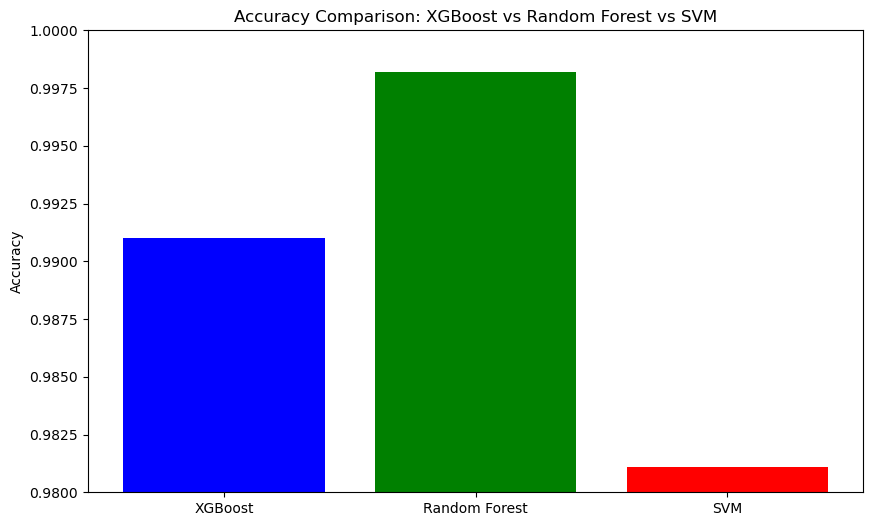

In [47]:
# Data for plotting
models = ['XGBoost', 'Random Forest', 'SVM']
accuracies = [0.9910, 0.9982, 0.9811]  # Replace 0.9950 with your SVM model's accuracy

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.ylim(0.98, 1)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: XGBoost vs Random Forest vs SVM')
plt.show()

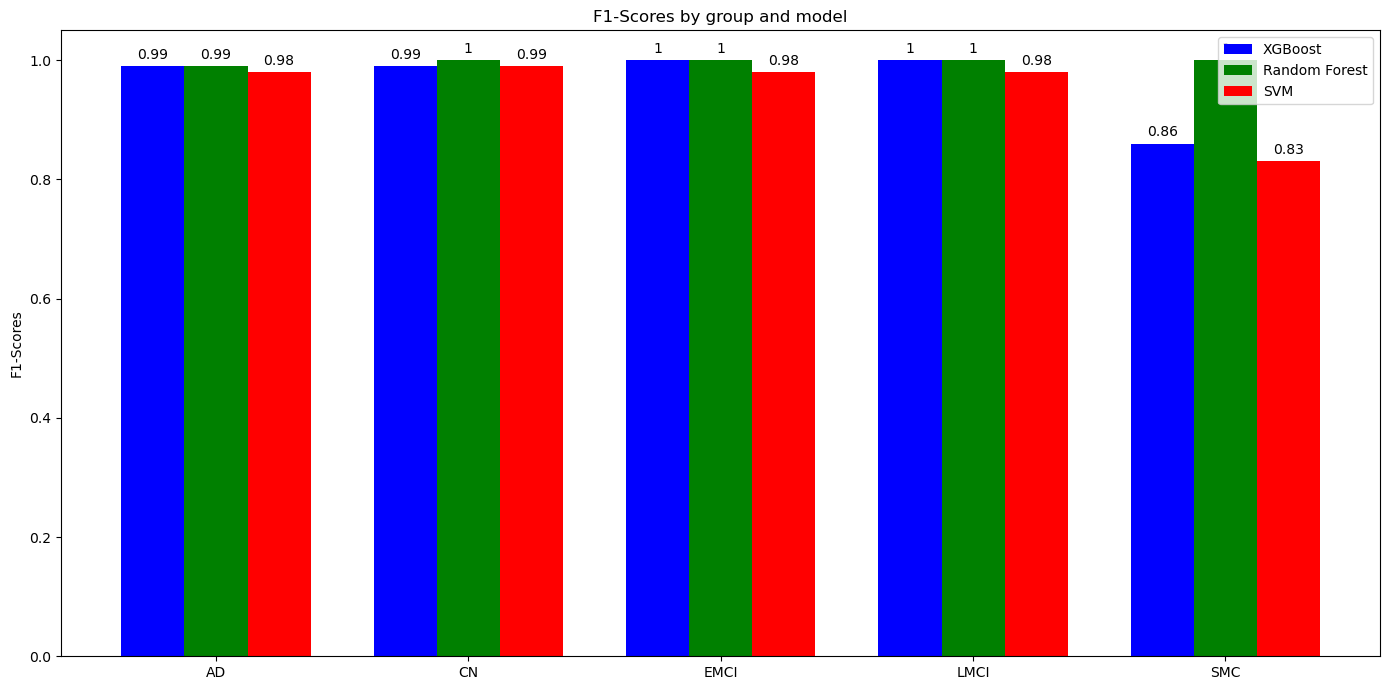

In [48]:
import numpy as np
import matplotlib.pyplot as plt

labels = ['AD', 'CN', 'EMCI', 'LMCI', 'SMC']
xgb_f1 = [0.99, 0.99, 1.00, 1.00, 0.86]  
rf_f1 = [0.99, 1.00, 1.00, 1.00, 1.00]  
svm_f1 = [0.98, 0.99, 0.98, 0.98, 0.83]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 7))
rects1 = ax.bar(x - width, xgb_f1, width, label='XGBoost', color='blue')
rects2 = ax.bar(x, rf_f1, width, label='Random Forest', color='green')
rects3 = ax.bar(x + width, svm_f1, width, label='SVM', color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1-Scores')
ax.set_title('F1-Scores by group and model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()

## Detailed Performance Analysis of XGBoost, Random Forest, and SVM Models

The visual comparisons below display the performance metrics for three machine learning models: XGBoost, Random Forest, and SVM. These metrics are pivotal for assessing the models' capabilities in classifying instances accurately within a dataset.

### Accuracy Comparison

![Accuracy Comparison]

The accuracy bar chart reveals the following about each model:

- **Random Forest**: Exhibits the highest accuracy at approximately 99.82%, indicating exceptional overall predictive performance.
- **XGBoost**: Follows closely with a high accuracy of approximately 99.10%, showcasing its effective handling of the dataset.
- **SVM**: Shows a lower accuracy of about 98.11%, which suggests that while it is a competent model, it may not capture the complexities of the dataset as effectively as the other two models.

### F1-Score Comparison

![F1-Score Comparison]

The F1-score bar chart presents a breakdown across different classes, which include Alzheimer's Disease (AD), Cognitively Normal (CN), Early Mild Cognitive Impairment (EMCI), Late Mild Cognitive Impairment (LMCI), and Significant Memory Concern (SMC):

- **AD, CN, EMCI Classes**: All models achieve high F1-scores, indicating strong and balanced performance for these classes.
- **LMCI Class**: Both XGBoost and Random Forest reach a perfect score, while SVM slightly underperforms, suggesting room for improvement.
- **SMC Class**: The performance disparity is most notable here, with SVM's F1-score dropping significantly, hinting at potential challenges SVM faces with this class.

### Comprehensive Insights

The ensemble models, particularly Random Forest, demonstrate superior and consistent performance across all classes, marking it as a highly reliable model for this dataset. XGBoost also shows strong performance but is marginally outperformed by Random Forest.

The SVM model, despite being outshined by the ensemble methods, might still be advantageous in scenarios where model transparency and interpretability are crucial, or where the model can be further optimized for specific classes like SMC.

### Concluding Thoughts

Choosing the optimal model requires a delicate balance between various factors. While accuracy and F1-score are critical, considerations such as computational efficiency, training time, interpretability, and the cost of misclassification must also be factored into the decision-making process. These visual comparisons serve as a foundational tool for stakeholders to make informed, data-driven decisions regarding model selection.
